---
title: 'Local Policy Recommendations for Crime Reduction'
subtitle: 'Final Report'
author: 
- "Alexa Bagnard, Joseph Gaustad, Kevin Hartman, Francis Leung"
- "(W203 Wednesday 6:30pm Summer 2019)"
date: "8/7/2019"
tags: [crime, lab, w203, berkeley]
abstract: This is our study on crime. Crime does not pay. Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
output:
  pdf_document: 
    latex_engine: xelatex
    fig_caption: yes
    fig_crop: no
    highlight: haddock
    keep_tex: yes
    number_sections: yes
    toc: yes
    toc_depth: 2
  html_document:
    fig_caption: yes
    theme: journal
    toc: yes
    toc_depth: 2
    df_print: paged
  word_document: default
---

In [1]:
library(stargazer)
library(cowplot)
library(ggplot2)
library(tidyr)
library(dplyr)
library(reshape2)
# options(kableExtra.latex.load_packages = TRUE)
# library(kableExtra)
library(plyr)
library(expss)
library(car)
library(corrplot)
library(gridExtra)
# library(corrr)
library(Hmisc)
library(broom)
library(lmtest)
library(sandwich)
library(PerformanceAnalytics)
library(psych)
library(GGally)
library(ggcorrplot)

suppressMessages(library(stargazer))
suppressMessages(library(cowplot))
suppressMessages(library(ggplot2))
suppressMessages(library(tidyr))
suppressMessages(library(dplyr))
suppressMessages(library(reshape2))
# suppressMessages(library(kableExtra))
suppressMessages(library(plyr))
suppressMessages(library(expss))
suppressMessages(library(car))
suppressMessages(library(corrplot))
suppressMessages(library(gridExtra))
# suppressMessages(library(corrr))
suppressMessages(library(Hmisc))
suppressMessages(library(broom))
suppressMessages(library(lmtest))
suppressMessages(library(sandwich))
suppressMessages(library(PerformanceAnalytics))
suppressMessages(library(psych))
suppressMessages(library(GGally))
suppressMessages(library(ggcorrplot))
suppressMessages(library(knitr))
knitr::opts_chunk$set(echo = TRUE)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(ply

# Introduction


## Background

In this report, we seek to examine and discuss determinants of crime and offer recommend actionable policy recommendations for local politicians running for election at the county level. For our analysis, we draw on sample data collected from a study by Cornwell and Trumball, researchers from the University of Georgia and West Virginia University. Our sample data includes data on crime rates, arrests, sentences,  demographics, local weekly wages, tax revenues and more drawn from local and federal government data sources. Although the age of the data may be a potential limitation of our study, we believe the insights we gather and policy recommendations remain appropriate for local campaigns today.

Our primary question that will drive our data exploration are to ask which variables affect crime rate the most.

## The Variables

The crime_v2 dataset provided includes 25 variables of interest. 

We include them below for reference by category of interest.

\begin{center}
\textbf{Data Dictionary}
\end{center}
Category | Variable
---------- | -------------------------------
Crime Rate | crmrte
Geographic | county, west, central
Demographic | urban, density, pctmin80, pctymle
Economic - Wage | wcon, wtuc, wtrd, wfir, wser, wmfg, wfed, wsta, wloc
Economic - Revenue  | taxpc
Law Enforcment | polpc, prbarr, prbconv, mix
Judicial/Sentencing | prbpris, avgsen
Time Period | year
\begin{center}
Table 1: Data Dictionary
\end{center}

The variables above operationalize the conditions we wish to explore and their affects on crime rate

Chiefly, these break down as follows.

* The Economic variables measures the county's economic activity and health (e.g. opportunity to pursue legal forms of income). These variables come in the form of available wages and tax revenue returned to the county.

* The Law enforcment variables measures the county's ability to utilize law enforcment policy to deter crime.  Similarly, the Judicial variables also signify impact of deterence to crime.

* The Demographic variables measure the cultural variability that represent the social differences between each county, such as urban vs rural and minority populations.

* The Geographic elements are categorical. They  represent they ways in which the population is segmented by geography.


# Exploratory Data Analysis (EDA)

## Data Prep and Exploration

We begin our analysis by loading the data set and performing basic checks and inspections.

In [2]:
dfCrime = read.csv("crime_v2.csv")

In [3]:
str(dfCrime)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [4]:
head(dfCrime)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [5]:
tail(dfCrime)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
summary(dfCrime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

First, we note there are missing rows in the dataset that were imported. We'll remove those rows now.

In [7]:
nrow(dfCrime)
dfCrime <-na.omit(dfCrime) # omit the NA rows
nrow(dfCrime)

[1] 97

[1] 91

Next, we will inspect the data to see if there are duplicate records

In [8]:
dfCrime[duplicated(dfCrime),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


A duplicate row exists. We'll remove it.

In [9]:
dfCrime <- dfCrime[!duplicated(dfCrime),] # remove the duplicated row
nrow(dfCrime)

[1] 90

We also saw that pbconv was coded as a level. It is not a level but a ratio. We'll change that now.

In [10]:
dfCrime$prbconv<-as.numeric(levels(dfCrime$prbconv))[dfCrime$prbconv]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

We also notice by comparision of pctymle and pctmin80 one of the variables is off by a factor of 100. We will divide pctmin80 by 100 so the two variables are in the same unit terms.

In [11]:
dfCrime$pctmin80<-dfCrime$pctmin80/100

County was expressed as a number. However, it is a categorical variable and we will convert it to a factor instead.

In [12]:
dfCrime$county<-as.factor(dfCrime$county)

Next we inspect the indicator variables to see if they were coded correctly.

In [13]:
dfCrime %>% group_by(west, central) %>% tally()

west,central,n
0,0,35
0,1,33
1,0,21
1,1,1


In [14]:
dfCrime %>%
filter(west ==1 & central ==1)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
71,87,0.0544061,0.243119,0.22959,0.379175,11.29,0.00207028,4.834734,31.53658,⋯,595.3719,240.3673,348.0254,295.2301,358.95,509.43,359.11,339.58,0.1018608,0.07939028


One county was either mis-coded, or it truly belongs to both regions. However, this is very unlikely as the intended technique is to widen the data and introduce indicator variables for each category. It is not likley the data was captured for both categories.

We will need further analysis on this datapoint as it relates to the rest of the data.

For now, we will encode a new region variable and place the datapoint in its own category.

In [15]:
#Map central and west to a region code, and create a new category for other
# Note that county 71 has both western and central codes
dfCrime$region <- case_when (
            (dfCrime$central ==0 & dfCrime$west ==0) ~ 0, #Eastern, Coastal, Other
            (dfCrime$central ==0 & dfCrime$west ==1) ~ 1, #Western
            (dfCrime$central ==1 & dfCrime$west ==0) ~ 2, #Central
            (dfCrime$central ==1 & dfCrime$west ==1) ~ 3 #Central-Western county?
        )
dfCrime$regcode =
            factor( dfCrime$region , levels = 0:3 , labels =
                    c( 'O',
                       'W',
                       'C',
                       'CW')
                   )

We will also introduce an indicator variable for counties located in the "other" region that are not west or central

In [16]:
dfCrime$other <- ifelse((dfCrime$central ==0 & dfCrime$west ==0), 1, 0)

And we'll add an indicator variable to serve as complement to the urban indicator variable and call this 'nonurban'

In [17]:
dfCrime$nonurban <- ifelse((dfCrime$urban==0), 1, 0)

By way of the 1980 Census fact sheet, we discover the urban field is an encoding for SMSA (Standard Metropolitan Statistical Areas). https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu8011uns_bw.pdf
The value is one if the county is inside a metropolitan area. Otherwise, if the county is outisde a metropolitan area, the value is zero.

We create a metro factor variable to better describe this feature.

In [18]:
# create factor for SMSA (standard metropolitan statistical areas) with two levels 
# (inside or outside)
#    https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu8011uns_bw.pdf
dfCrime$metro =
            factor( dfCrime$urban , levels = 0:1 , labels =
                    c( 'Outside',
                       'Inside'
                      )
                   )

Next we will visualize each variable and its relationship to the variable crmrte through scatter plots

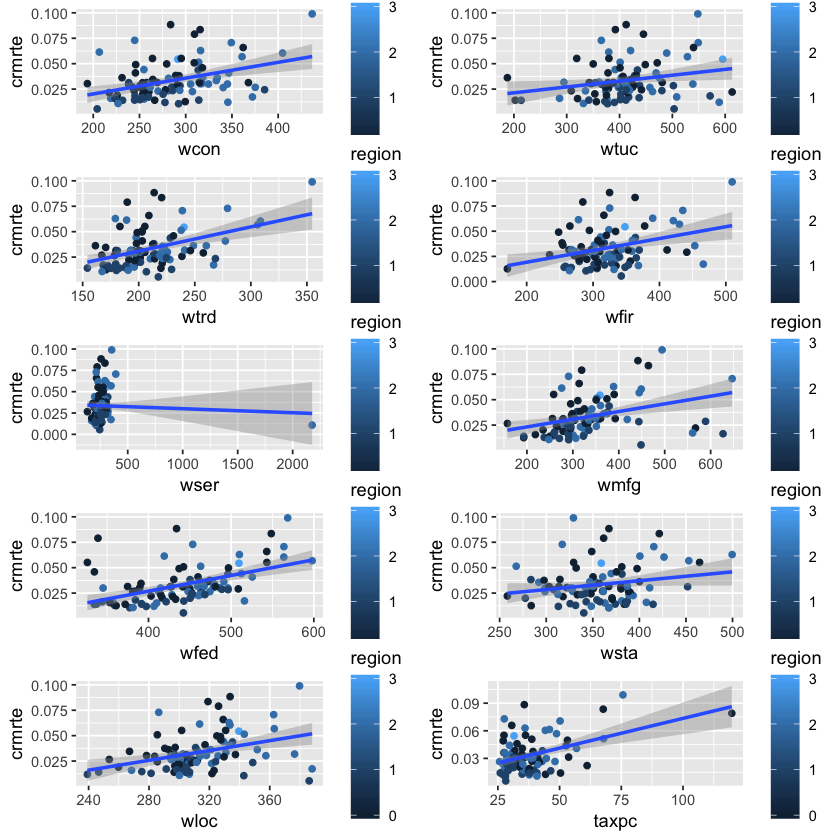

In [19]:
#Plot of the economic and tax related variables vs crmrte
q1<-ggplot(data = dfCrime, aes(x = wcon, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q2<-ggplot(data = dfCrime, aes(x = wtuc, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q3<-ggplot(data = dfCrime, aes(x = wtrd, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q4<-ggplot(data = dfCrime, aes(x = wfir, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q5<-ggplot(data = dfCrime, aes(x = wser, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q6<-ggplot(data = dfCrime, aes(x = wmfg, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q7<-ggplot(data = dfCrime, aes(x = wfed, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q8<-ggplot(data = dfCrime, aes(x = wsta, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q9<-ggplot(data = dfCrime, aes(x = wloc, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q10<-ggplot(data = dfCrime, aes(x = taxpc, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
grid.arrange(q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, ncol=2)

We observe a few data points of interest in the comparison above, notably, wser and taxpc appear to have extreme data points

Other variables show outliers as well, but not as extreme. We will see if any of these points have leverage or influence if chosen for models.

For now, lets dig further into the extreme outliers from our immediate visual inspection.

In [20]:
dfCrime %>%
filter(wser > 2000) %>%
select(county, wser)

county,wser
185,2177.068


This average service wage is much too high based on what we know about the 1980s and every other wage recorded in comparison. A review of the detailed population statistics describing mean wage per industry (table 231) confirms this. https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu801352uns_bw.pdf

We will adjust this wage by replacing it with an imputed value from the sample population. To impute this value we will rely on the package Hmisc to derive it for us.

In [21]:
dfCrime$wser[which(dfCrime$county==185)]<-NA # set the value to NA so it will be imputed

In [22]:
impute_arg <- aregImpute(~ crmrte +  urban + central + west + other +
                         prbarr + prbconv + prbpris + avgsen + polpc + 
                         density + taxpc + pctmin80 + wcon + wtuc +
                         wtrd + wfir + wser + wmfg + wfed + wsta + wloc +
                         mix + pctymle, data = dfCrime, match="weighted",
                         nk=3, B=10, n.impute = 100)

Iteration 100 


In [23]:
impute_arg


Multiple Imputation using Bootstrap and PMM

aregImpute(formula = ~crmrte + urban + central + west + other + 
    prbarr + prbconv + prbpris + avgsen + polpc + density + taxpc + 
    pctmin80 + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + 
    wsta + wloc + mix + pctymle, data = dfCrime, n.impute = 100, 
    nk = 3, match = "weighted", B = 10)

n: 90 	p: 24 	Imputations: 100  	nk: 3 

Number of NAs:
  crmrte    urban  central     west    other   prbarr  prbconv  prbpris 
       0        0        0        0        0        0        0        0 
  avgsen    polpc  density    taxpc pctmin80     wcon     wtuc     wtrd 
       0        0        0        0        0        0        0        0 
    wfir     wser     wmfg     wfed     wsta     wloc      mix  pctymle 
       0        1        0        0        0        0        0        0 

         type d.f.
crmrte      s    2
urban       l    1
central     l    1
west        l    1
other       l    1
prbarr      s    2
prbconv     s    2
p

In [24]:
impute_arg$imputed$wser

84,250,274.1775,274.1775,318.3635,274.1775,172.4733,221.3903,274.1775,274.1775,274.1775,⋯,274.1775,133.0431,274.1775,274.1775,274.1775,274.1775,318.3635,274.1775,274.1775,172.6281


We will reassign the value in our dataset to the mean from these trials.

In [25]:
dfCrime$wser[which(dfCrime$county==185)]<-mean(impute_arg$imputed$wser)
dfCrime$wser[which(dfCrime$county==185)]

[1] 246.9015

Next, let's examine the tax per capita outlier

In [26]:
dfCrime %>%
filter(taxpc > 100)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wfed,wsta,wloc,mix,pctymle,region,regcode,other,nonurban,metro
55,87,0.0790163,0.224628,0.207831,0.304348,13.57,0.00400962,0.5115089,119.7615,⋯,338.91,361.68,326.08,0.08437271,0.07613807,0,O,1,1,Outside


The tax revenue per capita in this county is excessive. There is nothing in the wage variables that would indicate more tax revenues should be captured than what is normal. We will adjust this taxpc data point by replacing it by imputing its value from the sample.

In [27]:
dfCrime$taxpc[which(dfCrime$county==55)]<- NA

In [28]:
impute_arg <- aregImpute(~ crmrte +  urban + central + west + other +
                         prbarr + prbconv + prbpris + avgsen + polpc + 
                         density + taxpc + pctmin80 + wcon + wtuc +
                         wtrd + wfir + wser + wmfg + wfed + wsta + wloc +
                         mix + pctymle, data = dfCrime, match="weighted",
                         nk=3, B=10, n.impute = 100)

Iteration 100 


In [29]:
impute_arg


Multiple Imputation using Bootstrap and PMM

aregImpute(formula = ~crmrte + urban + central + west + other + 
    prbarr + prbconv + prbpris + avgsen + polpc + density + taxpc + 
    pctmin80 + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + 
    wsta + wloc + mix + pctymle, data = dfCrime, n.impute = 100, 
    nk = 3, match = "weighted", B = 10)

n: 90 	p: 24 	Imputations: 100  	nk: 3 

Number of NAs:
  crmrte    urban  central     west    other   prbarr  prbconv  prbpris 
       0        0        0        0        0        0        0        0 
  avgsen    polpc  density    taxpc pctmin80     wcon     wtuc     wtrd 
       0        0        0        1        0        0        0        0 
    wfir     wser     wmfg     wfed     wsta     wloc      mix  pctymle 
       0        0        0        0        0        0        0        0 

         type d.f.
crmrte      s    2
urban       l    1
central     l    1
west        l    1
other       l    1
prbarr      s    2
prbconv     s    2
p

In [30]:
impute_arg$imputed$taxpc

25,50.19918,37.70785,30.99368,30.99368,27.3811,48.76492,61.15251,48.15414,48.15414,50.19918,⋯,67.84798,50.19918,30.99368,45.89987,30.99368,30.99368,26.89208,75.67243,75.67243,67.67963


In [31]:
dfCrime$taxpc[which(dfCrime$county==55)]<-mean(impute_arg$imputed$taxpc)
dfCrime$taxpc[which(dfCrime$county==55)]

[1] 47.74553

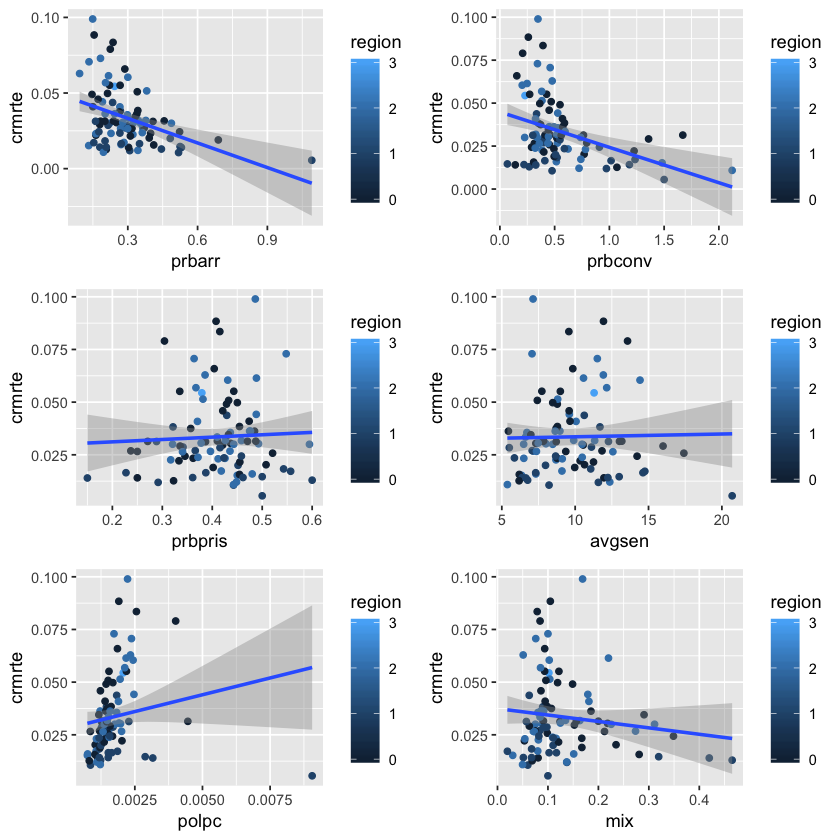

In [32]:
#Plot of the criminal justice and law enforcment related variables vs crmrte
q1<-ggplot(data = dfCrime, aes(x = prbarr, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q2<-ggplot(data = dfCrime, aes(x = prbconv, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q3<-ggplot(data = dfCrime, aes(x = prbpris, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q4<-ggplot(data = dfCrime, aes(x = avgsen, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q5<-ggplot(data = dfCrime, aes(x = polpc, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q6<-ggplot(data = dfCrime, aes(x = mix, y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")

grid.arrange(q1, q2, q3, q4, q5, q6, ncol=2)

The criminal justice and law enforcement variables also show evidence of possible outliers, notably, pbarr and polpc appear to have extreme data points

We also see that prbarr and prbconv have values greater than 1. However, these are not true probabity numbers and are instead ratios used as a stand in for the true probability numbers.

There is a possibility of higher arrests per incident for an area. Meaning, the area has low incidents in general but when there were incidents there were also multiple arrests. The same case can be made for the convictions per arrest variable which we see is for a different region. In that county there may have been multiple charges brought per one arrest.

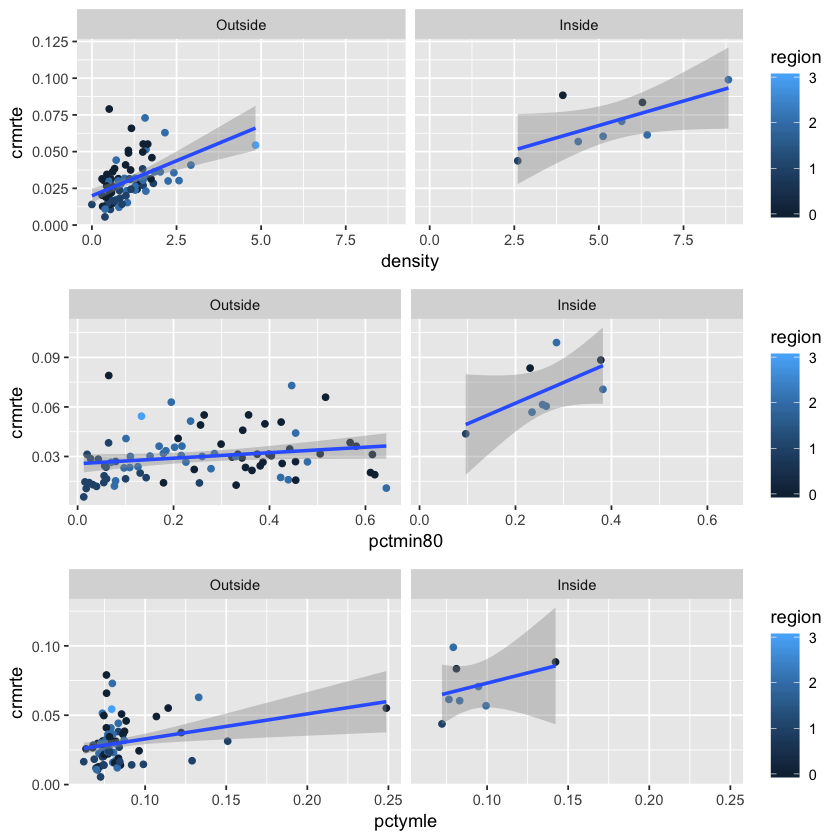

In [33]:
#plot of demographic information for counties Outside and Inside the metro areas
# population density, percent minority, percent young male

q1<-ggplot(data = dfCrime, aes(x = density, y = crmrte, color = region)) + 
      geom_point() + facet_wrap(~ metro) +
  geom_smooth(method = "lm")
q2<-ggplot(data = dfCrime, aes(x = pctmin80, y = crmrte, color = region)) + 
      geom_point() + facet_wrap(~ metro) +
  geom_smooth(method = "lm")
q3<-ggplot(data = dfCrime, aes(x = pctymle, y = crmrte, color = region)) + 
      geom_point()+ facet_wrap(~ metro) +
  geom_smooth(method = "lm")

grid.arrange(q1, q2, q3, ncol=1)

Notably more outliers are observed in demographic information. Here, pctymle in one county outside of a metro area is nearly 25%. That seems quite high in normal statistical measures of the population, however, this can be explained as a county having a large college town population.

Finally, we can see our bright blue region 3 county and notice its population density. Its behavior is more similar to an inside metro area. Than outside. In addition to be coded for both western and central regions, it appears to be miscoded here as well.

We will address the metro variable, and examine whether the region variable should be west, central or other instead of both central and west

In [34]:
dfCrime %>%
filter(west ==1 & central ==1) %>%
select(county, west, central, other, urban, region, regcode, metro)

county,west,central,other,urban,region,regcode,metro
71,1,1,0,0,3,CW,Outside


In [35]:
dfCrime$west[which(dfCrime$county==71)]<-NA
dfCrime$central[which(dfCrime$county==71)]<-NA
dfCrime$other[which(dfCrime$county==71)]<-NA
dfCrime$urban[which(dfCrime$county==71)]<-NA


In [36]:
impute_arg <- aregImpute(~ crmrte +  urban + central + west +
                         prbarr + prbconv + prbpris + avgsen + polpc + 
                         density + taxpc + pctmin80 + wcon + wtuc +
                         wtrd + wfir + wser + wmfg + wfed + wsta + wloc +
                         mix + pctymle, data = dfCrime, match="weighted",
                         nk=3, B=10, n.impute = 100)

Iteration 103 


In [37]:
impute_arg


Multiple Imputation using Bootstrap and PMM

aregImpute(formula = ~crmrte + urban + central + west + prbarr + 
    prbconv + prbpris + avgsen + polpc + density + taxpc + pctmin80 + 
    wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc + 
    mix + pctymle, data = dfCrime, n.impute = 100, nk = 3, match = "weighted", 
    B = 10)

n: 90 	p: 23 	Imputations: 100  	nk: 3 

Number of NAs:
  crmrte    urban  central     west   prbarr  prbconv  prbpris   avgsen 
       0        1        1        1        0        0        0        0 
   polpc  density    taxpc pctmin80     wcon     wtuc     wtrd     wfir 
       0        0        0        0        0        0        0        0 
    wser     wmfg     wfed     wsta     wloc      mix  pctymle 
       0        0        0        0        0        0        0 

         type d.f.
crmrte      s    2
urban       l    1
central     l    1
west        l    1
prbarr      s    2
prbconv     s    2
prbpris     s    2
avgsen      s    2
polpc   

In [38]:
impute_arg$imputed$central
median(impute_arg$imputed$central)

33,0,1,1,1,1,1,0,1,1,1,⋯,1,1,1,1,1,1,1,0,1,0


[1] 1

In [39]:
impute_arg$imputed$west
median(impute_arg$imputed$west)

33,0,0,0,0,0,0,0,0,0,0,⋯,1,1,0,0,0,0,0,0,0,1


[1] 0

In [40]:
impute_arg$imputed$urban
median(impute_arg$imputed$urban)

33,1,0,1,1,1,0,0,1,1,0,⋯,1,1,1,1,1,1,0,0,1,1


[1] 1

The results confirm the county is urban. It is also highly probable that county 71 is not west and is most associated with central. After correcting our data for urban and west, let's compare 'central' with 'other' to be certain we have the right region.

In [41]:
dfCrime$urban[which(dfCrime$county==71)]<-median(impute_arg$imputed$urban)
dfCrime$urban[which(dfCrime$county==71)]
dfCrime$nonurban[which(dfCrime$county==71)]<-(1-median(impute_arg$imputed$urban))
dfCrime$nonurban[which(dfCrime$county==71)]
dfCrime$west[which(dfCrime$county==71)]<-median(impute_arg$imputed$west)
dfCrime$west[which(dfCrime$county==71)]

[1] 1

[1] 0

[1] 0

In [42]:
impute_arg <- aregImpute(~ crmrte + central + other +
                         prbarr + prbconv + prbpris + avgsen + polpc + 
                         density + taxpc + pctmin80 + wcon + wtuc +
                         wtrd + wfir + wser + wmfg + wfed + wsta + wloc +
                         mix + pctymle, data = dfCrime, match="weighted",
                         nk=3, B=10, n.impute = 100)

Iteration 103 


In [43]:
impute_arg


Multiple Imputation using Bootstrap and PMM

aregImpute(formula = ~crmrte + central + other + prbarr + prbconv + 
    prbpris + avgsen + polpc + density + taxpc + pctmin80 + wcon + 
    wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc + mix + 
    pctymle, data = dfCrime, n.impute = 100, nk = 3, match = "weighted", 
    B = 10)

n: 90 	p: 22 	Imputations: 100  	nk: 3 

Number of NAs:
  crmrte  central    other   prbarr  prbconv  prbpris   avgsen    polpc 
       0        1        1        0        0        0        0        0 
 density    taxpc pctmin80     wcon     wtuc     wtrd     wfir     wser 
       0        0        0        0        0        0        0        0 
    wmfg     wfed     wsta     wloc      mix  pctymle 
       0        0        0        0        0        0 

         type d.f.
crmrte      s    2
central     l    1
other       l    1
prbarr      s    2
prbconv     s    2
prbpris     s    2
avgsen      s    2
polpc       s    2
density     s    2
taxpc       s 

In [44]:
impute_arg$imputed$other
median(impute_arg$imputed$other)

33,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 0

We also show a strong likelihood of the county not being other. The case for central is high. Since the county is not western and not other it must be in central by default, and the Hmisc algorithm bolsters that suggestion. We'll assign our new values.

In [45]:
dfCrime$other[which(dfCrime$county==71)]<-median(impute_arg$imputed$other)
dfCrime$other[which(dfCrime$county==71)]
dfCrime$central[which(dfCrime$county==71)]<-1-dfCrime$other[which(dfCrime$county==71)]
dfCrime$central[which(dfCrime$county==71)]

[1] 0

[1] 1

Recode the categories for region and metro

In [46]:
dfCrime$region <- case_when (
            (dfCrime$central ==0 & dfCrime$west ==0) ~ 0, #Eastern, Coastal, Other
            (dfCrime$central ==0 & dfCrime$west ==1) ~ 1, #Western
            (dfCrime$central ==1 & dfCrime$west ==0) ~ 2  #Central
        )
dfCrime$regcode =
            factor( dfCrime$region , levels = 0:2 , labels =
                    c( 'O',
                       'W',
                       'C' )
                   )

In [47]:
dfCrime$metro =
            factor( dfCrime$urban , levels = 0:1 , labels =
                    c( 'Outside',
                       'Inside'
                      )
                   )

In [48]:
dfCrime %>%
filter(county == 71) %>%
select(county, west, central, urban, region, regcode, metro)

county,west,central,urban,region,regcode,metro
71,0,1,1,2,C,Inside


Let's review our density numbers again by looking in more detail at its distribution.

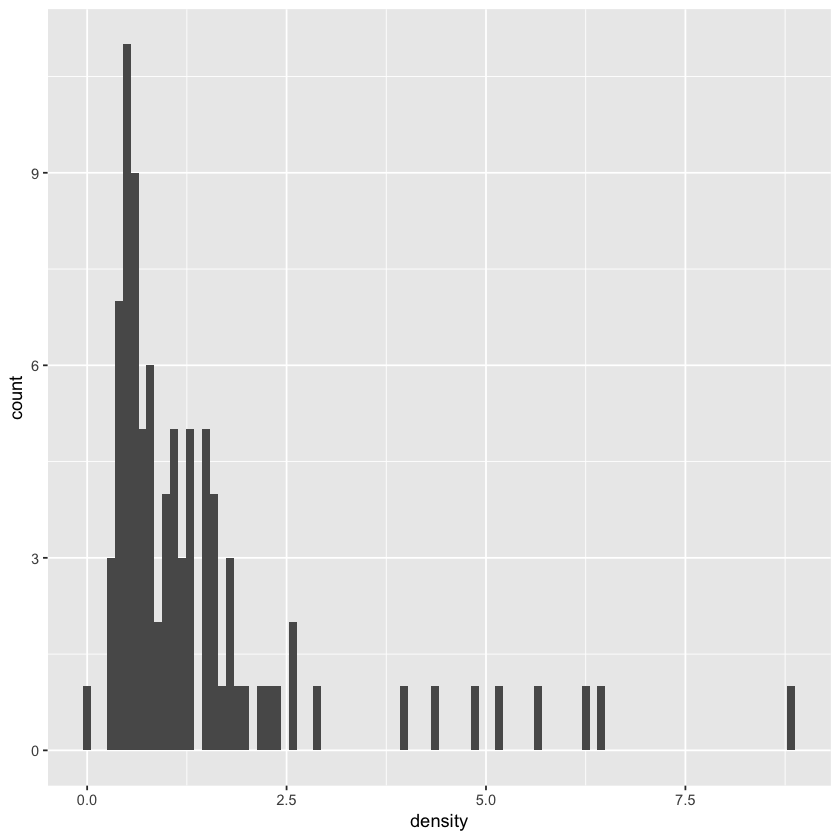

In [49]:
#options(repr.plot.width=8, repr.plot.height=4)
ggplot(data = dfCrime, aes(x = density)) + 
      geom_histogram(bins=90)

We note that one of the counties has an extremely low density. Near zero.

In [50]:
dfCrime %>%
filter(density < 0.01)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wfed,wsta,wloc,mix,pctymle,region,regcode,other,nonurban,metro
173,87,0.0139937,0.530435,0.327869,0.15,6.64,0.00316379,2.03422e-05,37.72702,⋯,334.44,414.68,304.32,0.4197531,0.07462687,1,W,0,1,Outside


In review of the North Carolina county density data from 1985, the smallest population density in any county in North Carolina is 0.0952. This makes the density of 0.0000203422 for county 173 statistically impossible. It is miscoded.

http://ncosbm.s3.amazonaws.com/s3fs-public/demog/dens7095.xls

(Note to team: We could use this table if we want to assign names to our counties by comparing the population densities. What is interesting is that the 6 rows of missing values we removed earlier can be found in the tail of this table. There was an arbitrary cut off after a certain density - lkely because the counties were not statistically significant. County 173 is not one of those counties, however, as our imputation process will demonstrate.)

In [51]:
dfCrime$density[which(dfCrime$county==173)]<- NA

In [52]:
#dfSubset <-  #we will use the non-urban western counties
impute_arg <- aregImpute(~ crmrte + 
                         prbarr + prbconv + prbpris + avgsen + polpc + 
                         density + taxpc + pctmin80 + wcon + wtuc +
                         wtrd + wfir + wser + wmfg + wfed + wsta + wloc +
                         mix + pctymle, data = dfCrime %>% filter(urban==0 & west ==1),
                         match="weighted",  nk=3, B=10, n.impute = 30)

Iteration 30 


In [53]:
impute_arg


Multiple Imputation using Bootstrap and PMM

aregImpute(formula = ~crmrte + prbarr + prbconv + prbpris + avgsen + 
    polpc + density + taxpc + pctmin80 + wcon + wtuc + wtrd + 
    wfir + wser + wmfg + wfed + wsta + wloc + mix + pctymle, 
    data = dfCrime %>% filter(urban == 0 & west == 1), n.impute = 30, 
    nk = 3, match = "weighted", B = 10)

n: 20 	p: 20 	Imputations: 30  	nk: 3 

Number of NAs:
  crmrte   prbarr  prbconv  prbpris   avgsen    polpc  density    taxpc 
       0        0        0        0        0        0        1        0 
pctmin80     wcon     wtuc     wtrd     wfir     wser     wmfg     wfed 
       0        0        0        0        0        0        0        0 
    wsta     wloc      mix  pctymle 
       0        0        0        0 

         type d.f.
crmrte      s    2
prbarr      s    2
prbconv     s    2
prbpris     s    2
avgsen      s    2
polpc       s    2
density     s    1
taxpc       s    2
pctmin80    s    2
wcon        s    2
wtuc        s   

In [54]:
impute_arg$imputed$density

16,0.4127659,0.4127659,0.4487427,0.4127659,0.4127659,0.4127659,0.4127659,0.4127659,0.4127659,0.4127659,⋯,0.4127659,0.4127659,0.4127659,0.4127659,0.4127659,0.4127659,0.4127659,0.4127659,0.4127659,1.815508


In [55]:
dfCrime$density[which(dfCrime$county==173)]<-mean(impute_arg$imputed$density)
dfCrime$density[which(dfCrime$county==173)]

[1] 0.5570559

Now, we will examine histograms for the remaining variables

No id variables; using all as measure variables


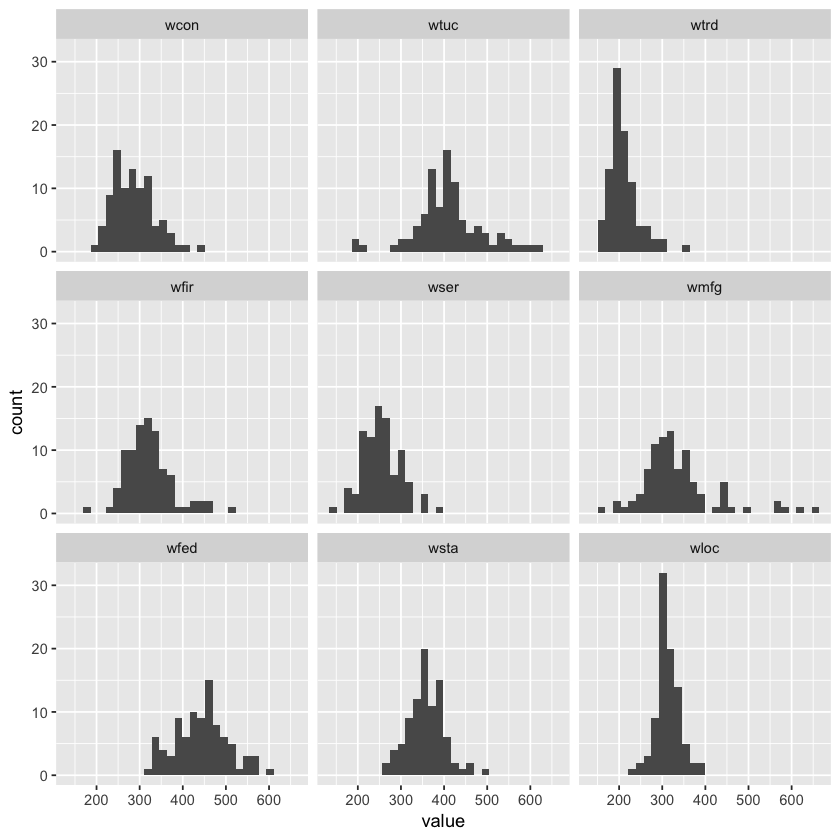

In [56]:
dfEconVars <- as.data.frame(cbind(dfCrime$wcon, dfCrime$wtuc, dfCrime$wtrd, dfCrime$wfir, 
                                  dfCrime$wser, dfCrime$wmfg, dfCrime$wfed, dfCrime$wsta, 
                                  dfCrime$wloc))
names(dfEconVars) <- c('wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 
                              'wmfg', 'wfed', 'wsta', 'wloc')

ggplot(melt(dfEconVars),aes(x=value)) + geom_histogram(bins=30) + facet_wrap(~variable)

Each histogram for the wage information looks  evenly distributed. We have no further remark at this time. We move to the justice an law enforcement variables. With these variables being mostly < 1 we'll also take the log for comparison.

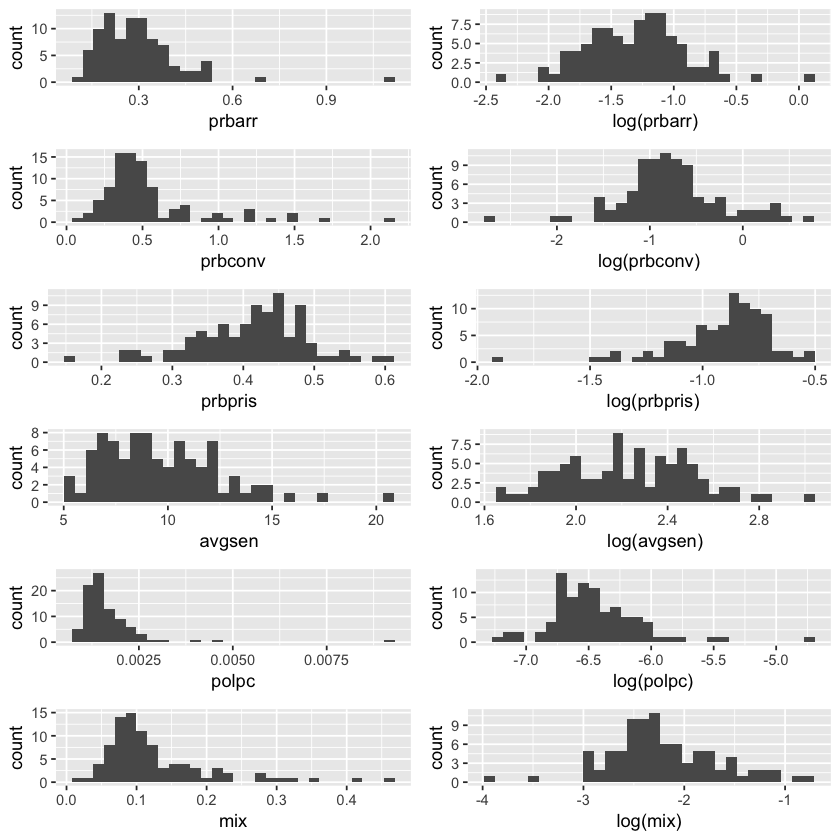

In [57]:
q1<-ggplot(data = dfCrime, aes(x = prbarr)) + 
      geom_histogram(bins=30)
q11<-ggplot(data = dfCrime, aes(x = log(prbarr))) + 
      geom_histogram(bins=30) 
            
q2<-ggplot(data = dfCrime, aes(x = prbconv)) + 
      geom_histogram(bins=30)
q21<-ggplot(data = dfCrime, aes(x = log(prbconv))) + 
      geom_histogram(bins=30)

q3<-ggplot(data = dfCrime, aes(x = prbpris)) + 
      geom_histogram(bins=30)
q31<-ggplot(data = dfCrime, aes(x = log(prbpris))) + 
      geom_histogram(bins=30)

q4<-ggplot(data = dfCrime, aes(x = avgsen)) + 
      geom_histogram(bins=30)
q41<-ggplot(data = dfCrime, aes(x = log(avgsen))) + 
      geom_histogram(bins=30)

q5<-ggplot(data = dfCrime, aes(x = polpc)) + 
      geom_histogram(bins=30)
q51<-ggplot(data = dfCrime, aes(x = log(polpc))) + 
      geom_histogram(bins=30)

q6<-ggplot(data = dfCrime, aes(x = mix)) + 
      geom_histogram(bins=30)
q61<-ggplot(data = dfCrime, aes(x = log(mix))) + 
      geom_histogram(bins=30)


grid.arrange(q1, q11, q2, q21, q3, q31, q4, q41, q5, q51, q6, q61, ncol=2)

The log transformation for these variables makes them more evenly distributed. We will transform these variables to their log equivalents and confirm with plots to see whether the result shows more linearity.

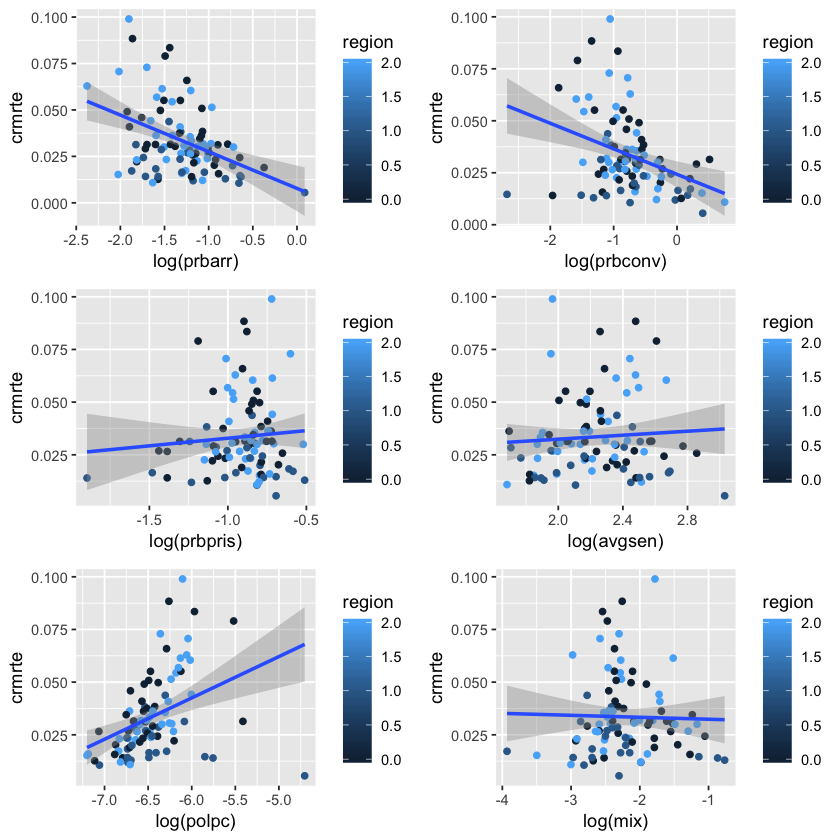

In [58]:
#Plot of the criminal justice and law enforcment related variables vs crmrte
q1<-ggplot(data = dfCrime, aes(x = log(prbarr), y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q2<-ggplot(data = dfCrime, aes(x = log(prbconv), y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q3<-ggplot(data = dfCrime, aes(x = log(prbpris), y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q4<-ggplot(data = dfCrime, aes(x = log(avgsen), y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q5<-ggplot(data = dfCrime, aes(x = log(polpc), y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")
q6<-ggplot(data = dfCrime, aes(x = log(mix), y = crmrte, color = region)) + 
      geom_point()+
  geom_smooth(method = "lm")

grid.arrange(q1, q2, q3, q4, q5, q6, ncol=2)

Of the six variables, only prbarr, prbconv and polpc show univariate correlation with crime. We believe these will be better candidates for our model selection. Further, we see mix has no correlation with crmrate and may be its own outcome variable.

In [59]:
dfCrime$logprbarr <- log(dfCrime$prbarr)
dfCrime$logprbconv <- log(dfCrime$prbconv)
dfCrime$logprbpris <- log(dfCrime$prbpris)
dfCrime$logavgsen <- log(dfCrime$avgsen)
dfCrime$logpolpc <- log(dfCrime$polpc)
dfCrime$logmix <- log(dfCrime$mix)

Next we take a look at the demographic histograms and their log alternatives

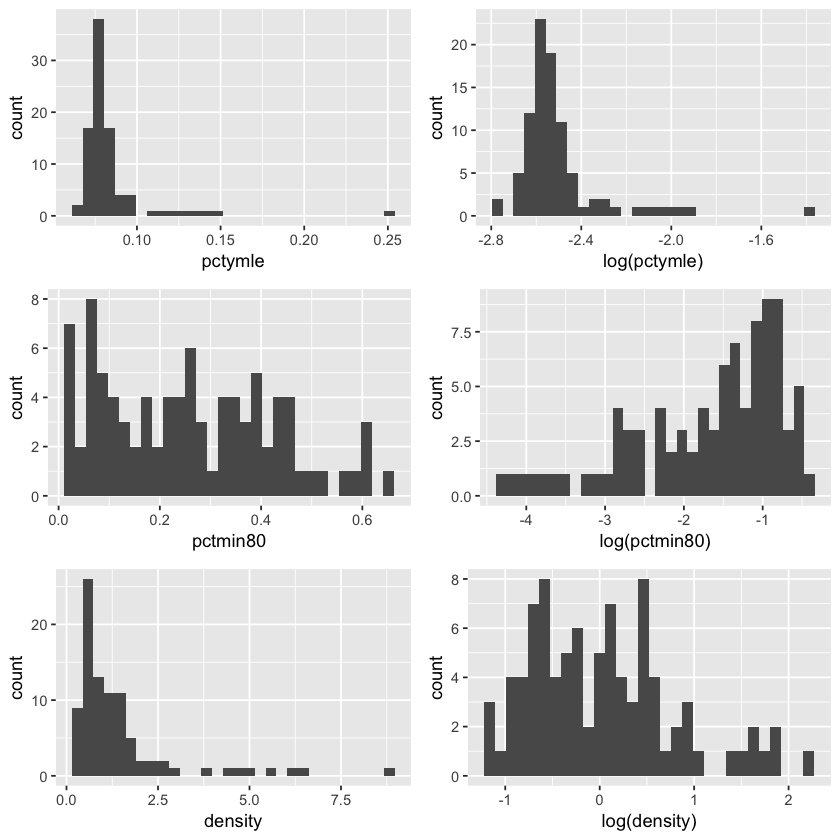

In [60]:
q1<-ggplot(data = dfCrime, aes(x = pctymle)) + 
      geom_histogram(bins=30)
q11<-ggplot(data = dfCrime, aes(x = log(pctymle))) + 
      geom_histogram(bins=30) 
            
q2<-ggplot(data = dfCrime, aes(x = pctmin80)) + 
      geom_histogram(bins=30)
q21<-ggplot(data = dfCrime, aes(x = log(pctmin80))) + 
      geom_histogram(bins=30)

q3<-ggplot(data = dfCrime, aes(x = density)) + 
      geom_histogram(bins=30)
q31<-ggplot(data = dfCrime, aes(x = log(density))) + 
      geom_histogram(bins=30)


grid.arrange(q1, q11, q2, q21, q3, q31, ncol=2)

The shape after transformation make the data more distributed. We will include transfomations of these variables as well.

In [61]:
dfCrime$logdensity <- log(dfCrime$density)
dfCrime$logtaxpc <- log(dfCrime$taxpc)
dfCrime$logpctmin80 <- log(dfCrime$pctmin80)
dfCrime$logpctymle <- log(dfCrime$pctymle)

Finally, we'll take a look at taxpc and the crmrte variable itself.

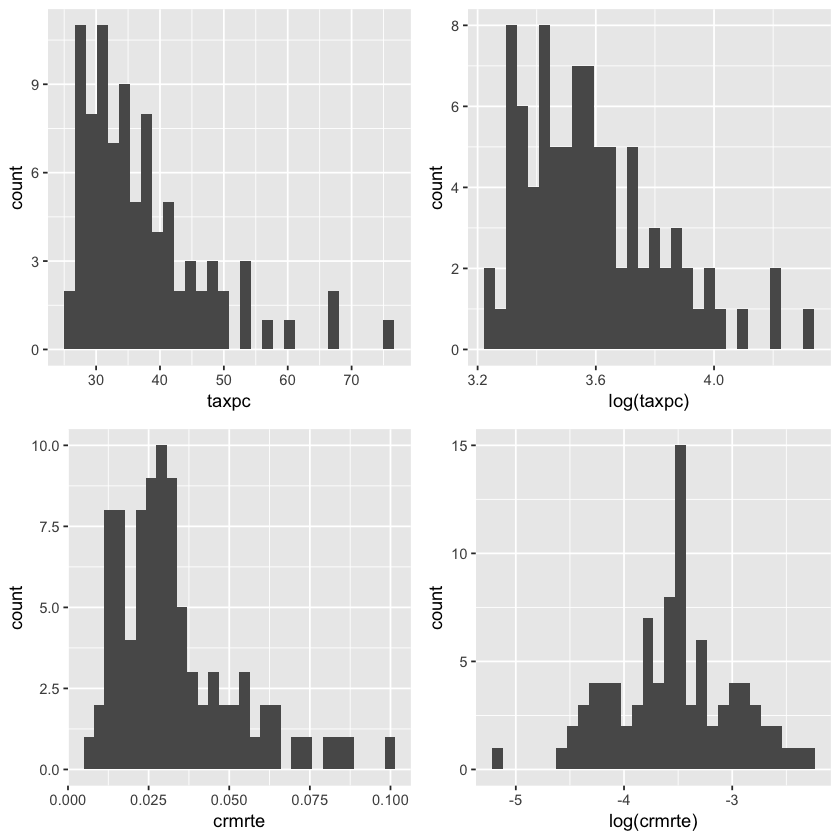

In [62]:
q1<-ggplot(data = dfCrime, aes(x = taxpc)) + 
      geom_histogram(bins=30)
q11<-ggplot(data = dfCrime, aes(x = log(taxpc))) + 
      geom_histogram(bins=30) 
            
q2<-ggplot(data = dfCrime, aes(x = crmrte)) + 
      geom_histogram(bins=30)
q21<-ggplot(data = dfCrime, aes(x = log(crmrte))) + 
      geom_histogram(bins=30)

grid.arrange(q1, q11, q2, q21, ncol=2)

The crmrte and taxpc variables are more evenly distributed after transformation. We'll add those to our dataframe.

In [63]:
dfCrime$logcrmrte = log(dfCrime$crmrte)
dfCrime4logtaxpc = log(dfCrime$taxpc)

As a final point of discussion we will identify additional variables  we wish to operationalize for use in our models. The include a variable that expresses the economic condition of the county and a variable that expresses criminal justice effectiveness.

The first variable on the economic condition will include the sum of all average weekly wages  from the 1980 census information. Since we do not know how many were employed at that wage we use this summary the best available proxy.

In [64]:
dfCrime$allWages<-dfCrime$wcon + dfCrime$wtuc + dfCrime$wtrd + dfCrime$wfir +
    dfCrime$wser + dfCrime$wmfg + dfCrime$wfed + dfCrime$wsta + dfCrime$wloc

As a second variable, we are interested in understanding the effectiveness of the criminal justice system as a crime deterrent. Our proxy will be the number of convictions per incident.

This is operationalized by taking the probability of arrests, pbrarr (which is defined as arrests per incident) and multiplying by the probability of convictions, pbrconv (which is defined as convictions per arrest). The new variable is defined below.

In [65]:
dfCrime$crimJustEff<-dfCrime$prbarr * dfCrime$prbconv

We will also create a logarithmic transformation of this variable based on our histogram analysis from before.

In [66]:
dfCrime$logcrimJustEff<-log10(dfCrime$crimJustEff)

## Summary and Results

Our outcome variable is the *crime rate* (“crmrte”), which is defined as the crimes committed per person in a specific county during 1987. The crime rate of the 90 counties in our sample dataset range between 0.0055 - 0.0990, with a mean of 0.0335.

From the boxplot below, most of the counties have a crime rate between 0.0055 and 0.0700, with 5 outliers having a crime rate > 0.0700.

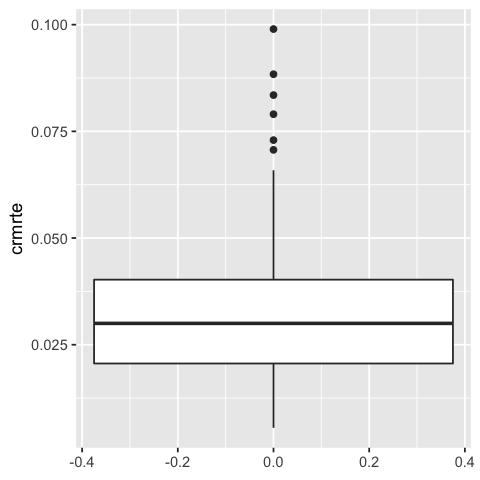

In [67]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(data = dfCrime, aes(y = crmrte)) + 
      geom_boxplot()

While mix (the type of crime committed) is also potentially an outcome variable, our research focuses on providing policy recommendations to reduce crime in general and not a specific type of crime. Mix is also not a linear outcome and hence difficult to measure. 

We propose 3 multiple linear regression models

* First Model: Has only the explanatory variables of key interest and no other covariates.

* Second Model: Includes the explanatory variables and covariates that increase the accuracy of our results without substantial bias.

* Third Model: An expansion of the second model with most covariates, designed to demonstrate the robustness of our results to model specification.

As we proceed with each model, we verify the CLM assumptions of OLS are addressed below:

* **MLR1** Linear in parameters: The models have had its data transformed as described above to allow a linear fit of the model.
* **MLR2** Random Sampling: The data is collected from a data set with rolled up data for each county.  It is not randomly sampled by area or population.
* **MLR3** No perfect multicollinearity: None of the variables chosen for the model are constant or perfectly collinear as demonstrated by the scatterplot below.
* **MLR4'** The expectation of u and and covariance of each regressor with u are ~0.  This shows that our model’s regressors are exogenous with the error.
* **MLR5'** Spherical errors: There is homoscedasticity and no autocorrelation [TBD].
* **MLR6'** Our error terms should be normally distributed [TBD]. 

By satisfying these assumptions, we can expect  our coefficients will be approaching the true parameter values in probability.

#### Evidence of multi-collinearity (or perfect collinearity)?

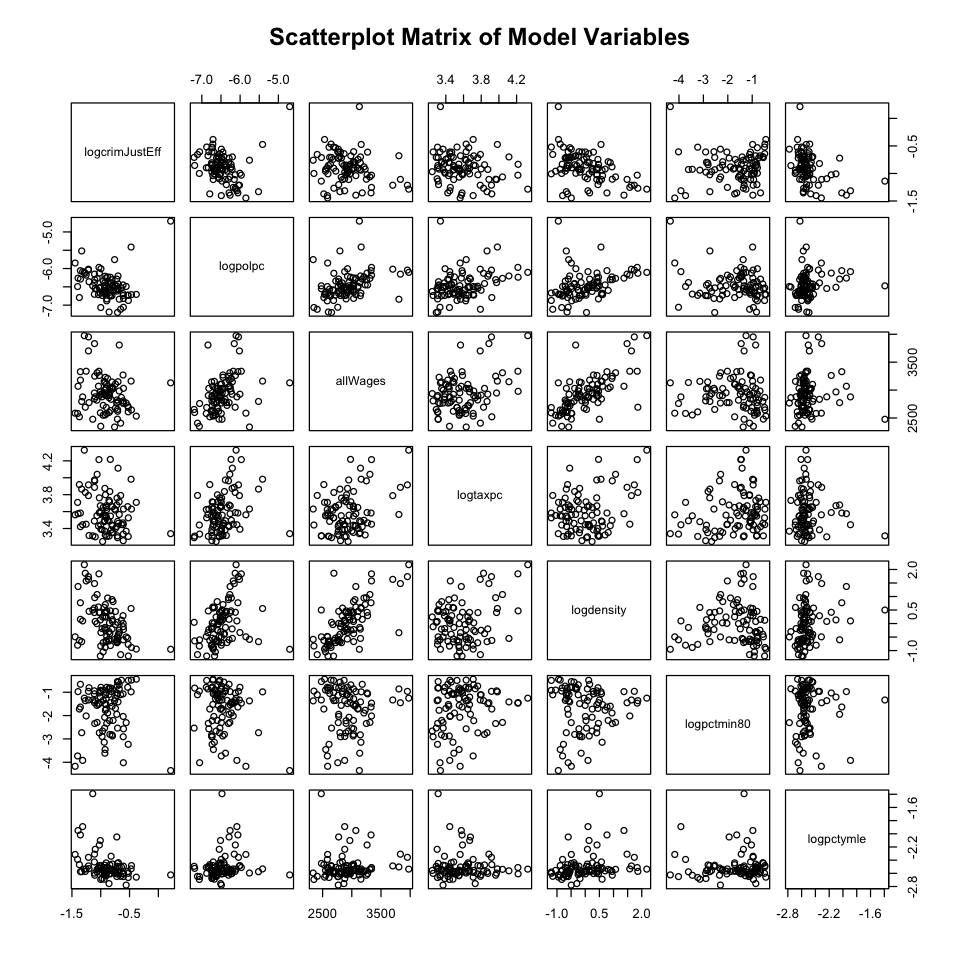

In [68]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(~ logcrimJustEff + logpolpc + allWages + logtaxpc + logdensity + logpctmin80 +
        logpctymle, data=dfCrime, main="Scatterplot Matrix of Model Variables")

# Model Analysis

## Model 1 
### Introduction
Our base hypothesis is that crime can be fundamentally explained by two factors: the effectiveness of the criminal justice system and the economic conditions.

Criminal Justice Effectiveness is self defined : To be able to track crimes, they must be reported to police, who can then make arrests and the legal system provides judgement (convictions/sentencing)
Criminal justice also has a relationship to crime as a deterrent, as the probability of getting caught, convicted, sentenced could potentially deter crime.

We operationalize criminal justice effectiveness as (probability of Convictions * Crimes committed). We define this as: prbconv * prbarr = conv/arrest * arrest/crime = convictions/crime. Without more granular data, this provides a single parsimonious metric that helps understand how the law enforcement and criminal justice system works.

### Model 1 EDA

**Data Transformations**

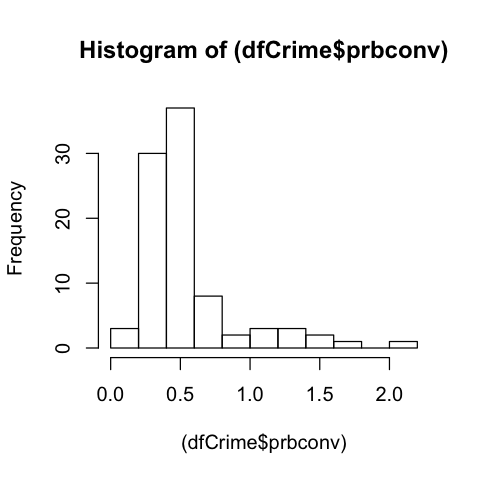

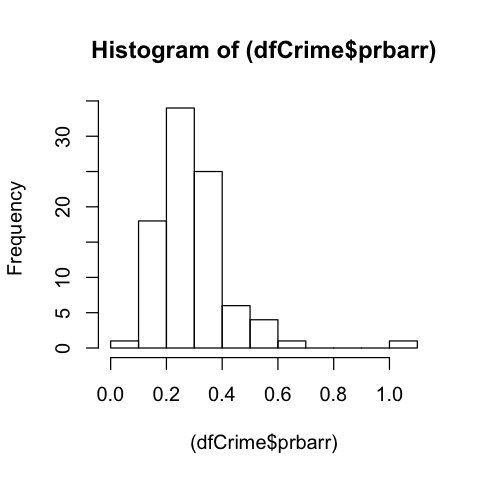

In [69]:
options(repr.plot.width=4, repr.plot.height=4)
hist((dfCrime$prbconv))
hist((dfCrime$prbarr))

The distribution of both probability of conviction and probability of arrest are peculiar and non-normal.  It could be argued that both of these variables should be bound between 0 and 1.  However, "probability" of conviction is proxied by a ratio of convictions to arrests.  It is in fact common that defendents are charged with multiple crimes and convicted, but were only arrested once. 

For "probability" of arrest, it could be possible there are multiple arrests for a single offense. However, the single data point that is greater than one, is >3 standard deviations away from the distribution.  This outlier will have high leverage on our model and will be preemptively removed as the data supplied is likely in error and is not representative of the bulk of North Carolina counties. 

For parsimony, we can simply the probability of arrest and probability of conviction by multiplying to effectively get the ratio of convictions to offenses.  The normality of this factor can be improved by taking a log transform. QQ plots help to visualize how normality improves for the inner quartiles.

[1] 5.779438

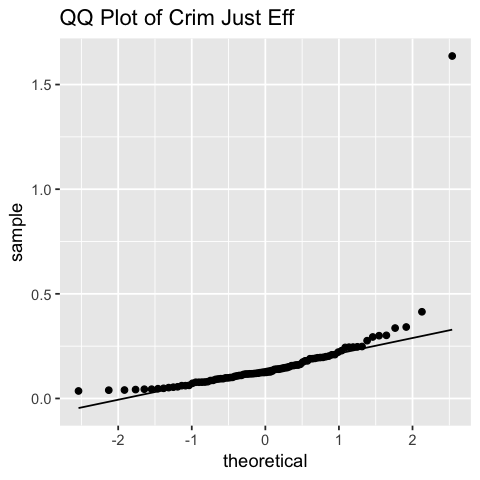

In [70]:
# how many standard deviations away the outlier lies
(dfCrime[51,]$prbarr - mean(dfCrime$prbarr))/sd(dfCrime$prbarr) 
#hist(log(dfCrime$crimJustEff))
ggplot(data=dfCrime, aes(sample= crimJustEff)) + stat_qq() + stat_qq_line() + 
  ggtitle("QQ Plot of Crim Just Eff")

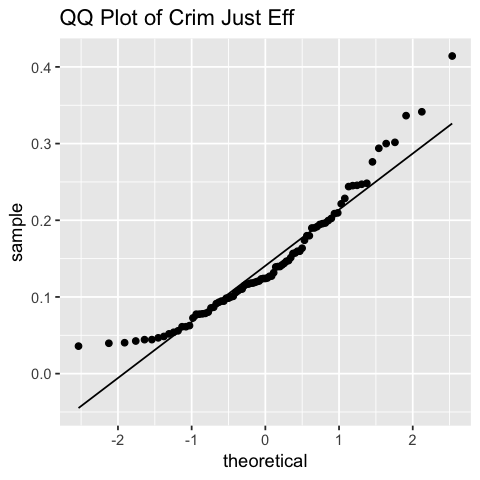

In [71]:
dfCrime <- dfCrime[dfCrime$crimJustEff < 1,] # removing high flying outlier
ggplot(data=dfCrime, aes(sample= crimJustEff)) + stat_qq() + stat_qq_line() + 
  ggtitle("QQ Plot of Crim Just Eff")

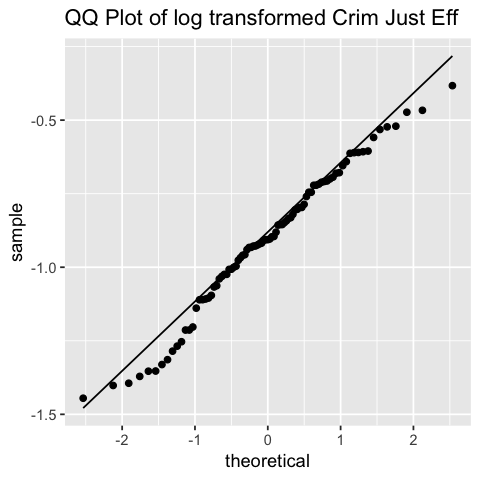

In [72]:
ggplot(data=dfCrime, aes(sample= logcrimJustEff)) + stat_qq() + stat_qq_line() + 
ggtitle("QQ Plot of log transformed Crim Just Eff")
## Can show histogram/qqplot side by side in RMD. 

We theorize that the second major cause of crime are bad economic conditions.  When there are worse economic conditions, crime can be more attractive due to:

* Lack of means: People forced into crimes because they need to make ends meet
* Lack of occupation: People commit crimes because they are not busy at work
* Lack of opportunity: High discount rate for future due to no long-term opportunity, incentive to take the risk and commit crimes hoping for big payoff. 

We operationalize economic conditions by looking at wages. For this model, we define this as the sum of all average wages in each county. We think this is best proxy from our data because it answers all of the above (higher wages leads to better means and better opportunities). From our EDA we also confirm that in general these sums are not skewed by having 1 really high paying sector in each county as we see a strong relationship between avg quartile across all job types and total sum.  This can be seen in the chart below.

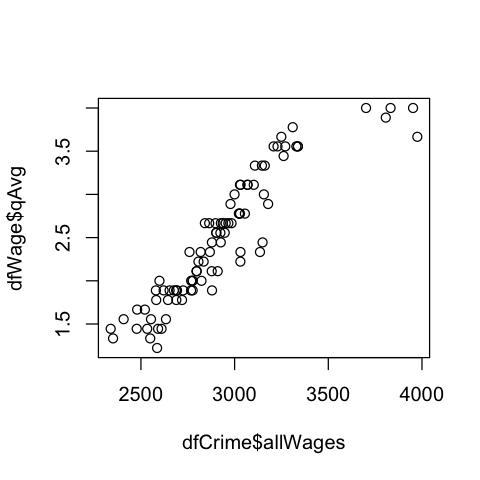

In [73]:
# # Quantiles for all jobs
dfWage<-mutate(dfCrime,qCon=ntile(dfCrime$wcon,4))
dfWage<-mutate(dfWage,qTuc=ntile(dfCrime$wtuc,4))
dfWage<-mutate(dfWage,qTrd=ntile(dfCrime$wtrd,4))
dfWage<-mutate(dfWage,qFir=ntile(dfCrime$wfir,4))
dfWage<-mutate(dfWage,qSer=ntile(dfCrime$wser,4))
dfWage<-mutate(dfWage,qMfg=ntile(dfCrime$wmfg,4))
dfWage<-mutate(dfWage,qFed=ntile(dfCrime$wfed,4))
dfWage<-mutate(dfWage,qSta=ntile(dfCrime$wsta,4))
dfWage<-mutate(dfWage,qLoc=ntile(dfCrime$wloc,4))
## Average quantile
dfWage$qAvg= (dfWage$qCon+dfWage$qTuc+dfWage$qTrd+dfWage$qFir+dfWage$qSer+dfWage$qMfg+
                dfWage$qFed+dfWage$qSta+dfWage$qLoc)/9
plot(dfCrime$allWages,dfWage$qAvg)

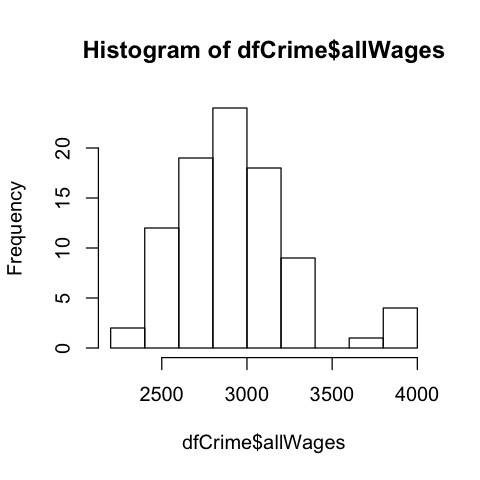

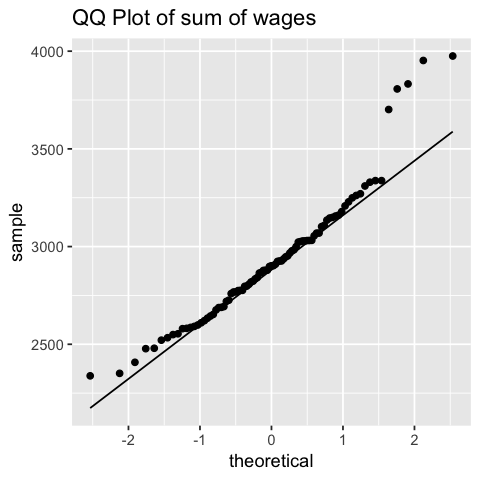

In [74]:
hist(dfCrime$allWages)
ggplot(data=dfCrime, aes(sample= allWages)) + stat_qq() + stat_qq_line() +
  ggtitle("QQ Plot of sum of wages")

### Model 1 Linear Model

In [117]:
mod1 <- lm(dfCrime$logcrmrte ~ dfCrime$allWages + dfCrime$logcrimJustEff)
(mod1)
summary(mod1)
## will be details on effect size and standard error as we cover this in class.


Call:
lm(formula = dfCrime$logcrmrte ~ dfCrime$allWages + dfCrime$logcrimJustEff)

Coefficients:
           (Intercept)        dfCrime$allWages  dfCrime$logcrimJustEff  
            -6.3001205               0.0006383              -1.0001313  



Call:
lm(formula = dfCrime$logcrmrte ~ dfCrime$allWages + dfCrime$logcrimJustEff)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02252 -0.21971  0.00057  0.23789  0.70667 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -6.3001205  0.3737428 -16.857  < 2e-16 ***
dfCrime$allWages        0.0006383  0.0001286   4.964 3.45e-06 ***
dfCrime$logcrimJustEff -1.0001313  0.1742672  -5.739 1.40e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3853 on 86 degrees of freedom
Multiple R-squared:  0.4686,	Adjusted R-squared:  0.4562 
F-statistic: 37.91 on 2 and 86 DF,  p-value: 1.565e-12


In [118]:
mod1adj<-lm(dfCrime$logcrmrte ~ dfCrime$allWages + dfCrime$logcrimJustEff + dfCrime$allWages*dfCrime$logcrimJustEff)
summary(mod1adj)


Call:
lm(formula = dfCrime$logcrmrte ~ dfCrime$allWages + dfCrime$logcrimJustEff + 
    dfCrime$allWages * dfCrime$logcrimJustEff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89649 -0.21977 -0.01897  0.25878  0.73844 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -3.6325337  1.4483035  -2.508   0.0140
dfCrime$allWages                        -0.0002936  0.0005055  -0.581   0.5629
dfCrime$logcrimJustEff                   1.6374199  1.3955551   1.173   0.2439
dfCrime$allWages:dfCrime$logcrimJustEff -0.0009173  0.0004817  -1.904   0.0602
                                         
(Intercept)                             *
dfCrime$allWages                         
dfCrime$logcrimJustEff                   
dfCrime$allWages:dfCrime$logcrimJustEff .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3796 on 85 degrees of freedom
Multiple R-squared:

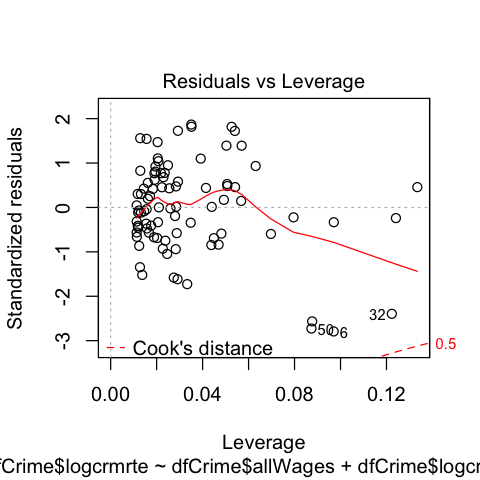

In [114]:
plot(mod1, which=5)

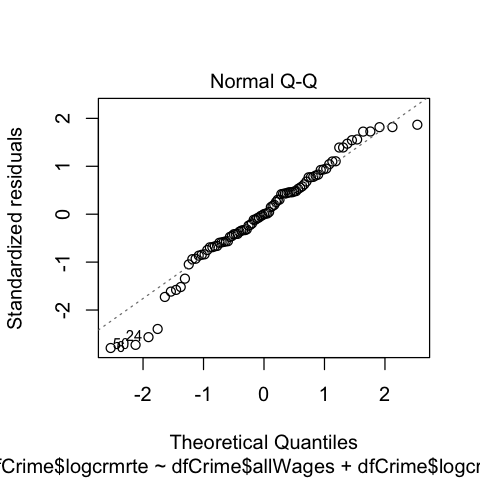

In [77]:
plot(mod1, which=2)

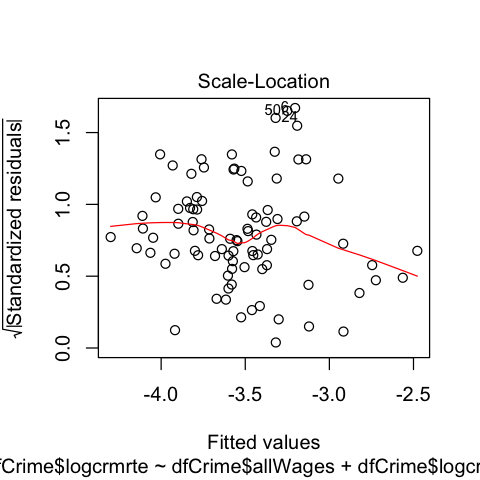

In [78]:
plot(mod1, which=3)

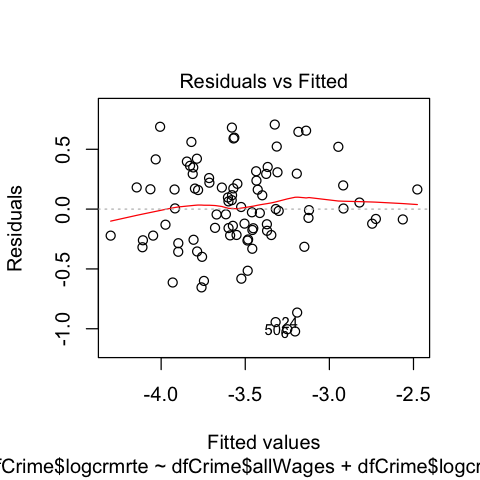

In [79]:
plot(mod1, which=1)

The model shows a moderate good fit, with an adjusted R square of 0.46.  This can be interpreted as, the model explains 46% of the variation in crime.  Next the model is plotted in a Residuals vs Leverage plot.  This plot shows that all the points have a cook's distance of less than 0.5.  There are no points that have enough leverage and residual than when deleted greatly alter the model coefficients. 

The root of standardized residuals all fall within about 1.6.  This is very good, as we can expect 95% of the points to fall within 3 standardized residuals of each other. ($\sqrt(3) \approx 1.73$)

Finally, the residuals vs fitted plot shows a well centered and mostly nromal distribution about 0.  There are no major trends or variation changes across the fitted values.  This suggests that major uncorrelated variables have not been left out of the model.  We will discuss the possible ommited variable biases further, in the next sections.

**Model 1 CLM Assumptions: [To be finalized]**
* **MLR1** Linear in paramters: The model has had its data transformed as described above to allow a linear fit of the model.
* **MLR2** Random Sampling: The data is collected from a data set with rolled up data for each county.  It is not randomly sampled by area or population. 
* **MLR3** No perfect multicollinearity: None of the variables chosen for the model are constant or perfectly collinear as the economy and criminal justice effectiveness are independent.
* **MLR4'** The expectation of u and and covariance of each regressor with u are ~0.  This shows that our model's regressors are exogenous with the error.  

By satisfying these assumptions, we can expect that our coefficients are approaching the true parameter values in probability. 

##MLR 5,6 to be discussed in week 13...?

In [80]:
cov(resid(mod1), dfCrime$allWages)
cov(resid(mod1), log(dfCrime$crimJustEff))
mean(resid(mod1))

[1] -8.600207e-15

[1] 6.031491e-18

[1] 8.904772e-18

## Model 2

### Introduction
In this model, we introduce the additional covariates of population per square mile (density), tax per capita (taxpc) and police per capita (polpc) to increase the accuracy of our regression. We are including these additional variables to our second model, as they add accuracy to the explanatory variables used in our first model:  

1. The **DENSITY** of an area can have significant impacts on:
    - **Criminal Justice Effectiveness**: with more people in a given area, crime frequency increases (+ bias direction). However, more people means there are more potential witnesses, making it easier to catch criminals (- bias direction). 
    - **Economic Opportunity (ie. AllWages)**: in high density areas, there is an increase in demand for support services such as food, retail, utilities, etc. As a result, there is a high demand for service jobs, which increases the economic opportunities within the area (+ bias direction).  However, more people in a given area, there is a closer proximity to drugs, alcohol and gang violence - all of which are inhimitors to better economic outcomes. 
2. The **Police Per Capita** in a county can be influential on the Criminal Justice Effectiveness. With more police in a given area, one would think that crime rates would decrease, however our correlation plot below tells a different story. Including this variable in our analysis will give us more insight into the variables used in model 1. 
3. The **Tax Per Capita** can have a direct impact on the Police Per Capita. A higher tax per capita, means that the county has more tax dollars to spend on protection services (ie. increasing the number of police in the county). 


$$log(crmrate) = \beta_0 + \beta_1crimjusteff + \beta_2log(polpc) + \beta_3density + \beta_4allWages + \beta_5taxpc + u$$

### Model 2 EDA and Data Transformations

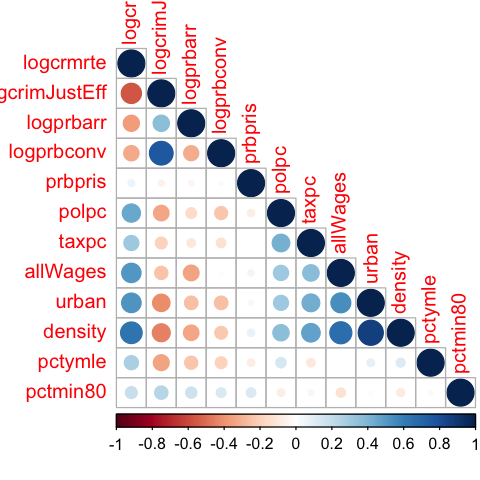

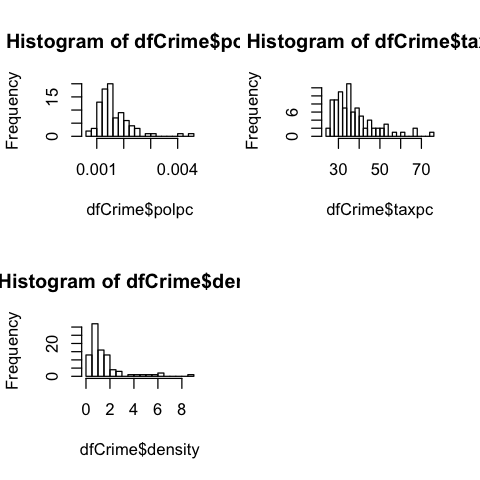

In [81]:
corrplot(cor(dfCrime[,c("logcrmrte", "logcrimJustEff", "logprbarr", "logprbconv", 
                        "prbpris", "polpc", "taxpc", "allWages", "urban", "density",
                        "pctymle", "pctmin80")]),method='circle', type = 'lower')

par(mfrow = c(2,2))
hist(dfCrime$polpc, breaks=25)
hist(dfCrime$taxpc, breaks=25)
hist(dfCrime$density, breaks=25)

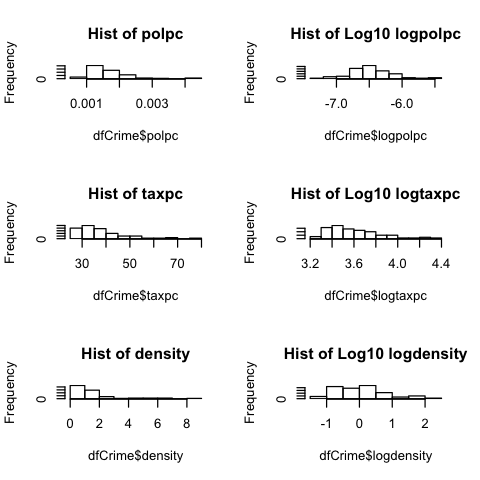

In [82]:
par(mfrow = c(3,2))
hist(dfCrime$polpc, main="Hist of polpc")
hist(dfCrime$logpolpc, main="Hist of Log10 logpolpc")
hist(dfCrime$taxpc, main="Hist of taxpc")
hist(dfCrime$logtaxpc, main="Hist of Log10 logtaxpc")
hist(dfCrime$density, main="Hist of density")
hist(dfCrime$logdensity, main="Hist of Log10 logdensity")

In [83]:
# par(mfrow = c(2,2))
# plot(dfCrime$logcrimJustEff, dfCrime$polpc, main = 'polpc vs logcrimJustEff', xlab='logcrimJustEff', ylab='polpc')
# plot(dfCrime$logcrimJustEff, dfCrime$logpolpc, main = 'logpolpc vs logcrimJustEff', xlab='logcrimJustEff', ylab='logpolpc')
# plot(dfCrime$logcrimJustEff, dfCrime$taxpc, main = 'taxpc vs logcrimJustEff', xlab='logcrimJustEff', ylab='taxpc')
# plot(dfCrime$logcrimJustEff, dfCrime$logtaxpc, main = 'logtaxpc vs logcrimJustEff', xlab='logcrimJustEff', ylab='logtaxpc')

In the histograms above, we see that the both polpc and taxpc exhibit right skew. Taking the $log_{10}$ of polpc brings the distribution closer to normal. However, the $log$ of taxpc and density makes the distributions even more skewed. 

As a result, we will use the $log$ of polpc (logpolpc) in our second model and will not transform the taxpc and density variables. 

### Model 2 Linear Model

In [151]:
model2 <- lm(logcrmrte ~ logcrimJustEff + logpolpc + log(allWages) + logtaxpc + density, data = dfCrime)
model2

summary(model2)


Call:
lm(formula = logcrmrte ~ logcrimJustEff + logpolpc + log(allWages) + 
    logtaxpc + density, data = dfCrime)

Coefficients:
   (Intercept)  logcrimJustEff        logpolpc   log(allWages)        logtaxpc  
       -7.2260         -0.6273          0.4075          0.7794         -0.1693  
       density  
        0.1137  



Call:
lm(formula = logcrmrte ~ logcrimJustEff + logpolpc + log(allWages) + 
    logtaxpc + density, data = dfCrime)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11426 -0.17313 -0.02422  0.26817  0.64830 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.22598    4.04951  -1.784 0.078012 .  
logcrimJustEff -0.62726    0.17932  -3.498 0.000756 ***
logpolpc        0.40748    0.14117   2.886 0.004964 ** 
log(allWages)   0.77938    0.46148   1.689 0.094994 .  
logtaxpc       -0.16929    0.18539  -0.913 0.363792    
density         0.11372    0.03617   3.144 0.002314 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3502 on 83 degrees of freedom
Multiple R-squared:  0.5764,	Adjusted R-squared:  0.5508 
F-statistic: 22.59 on 5 and 83 DF,  p-value: 3.126e-14


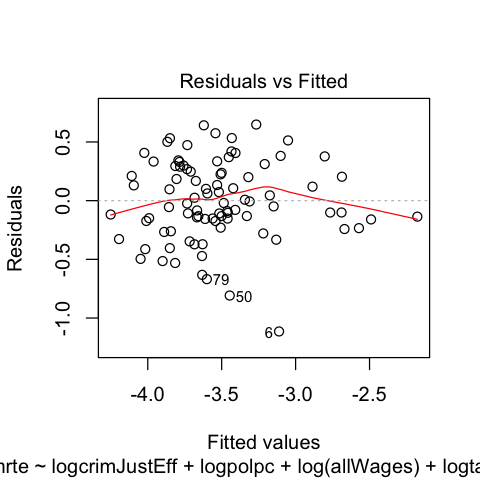

In [152]:
plot(model2, which =1 )

The Adjusted R-squared variable penalizes for additional variables, which means there is a chance that this value will decrease if the added variables do not contribute to the model. By comparing the Adjusted R-squared value between our first and second models, we see that log(polpc), taxpc and density help describe log(crmrate). Our second model has an Adjusted R-squared value of 0.5004, which means 50.04% of the variation in the $log_{10}$ of crime rate is explained by the explanatory variables used in this model. This is a significant increase compared to our first model, that has an Adjusted R-squared value of  0.4520. 

In addition, the F-statistic is 16.62 with a statistically significant p-value of < 6.263e-11. As a result, we reject the null hypothesis that none of the independent variables help to describe log(crmrate). 

Coefficient Analysis (assuming ceterus paribus):
- logcrimJustEff: -0.1607. This suggests that for a 1% increase in criminal justice efficiency, there is a 0.1607% decrease in crime rate. 
- logpolpc: 0.3701. This suggests that for a 1% increase in police per capita, there is a 0.3701% increase in crime rate. 
- allWages: 0.00006692. This suggests that for a 1% increase in total average weekly wage, there is a 0.0067% increase in crime rate.
- taxpc: -0.001632. This suggests that for a 1% increase in tax per capita, there is a 0.1632% decrease in crime rate.
- density: 0.06259. This suggests that for a 1% increase in density, there is a 6.259% increase in crime rate.

### Results - **WIP**
- Standard Errors explanation will go here. Placeholder cell for now.


**Model 2 CLM Assumptions: [To be Finalized]**
* **MLR1** Linear in paramters: The model has had its data transformed as described above to allow a linear fit of the model.
* **MLR2** Random Sampling: The data is collected from a data set with rolled up data for each county.  It is not randomly sampled by area or population. 
* **MLR3** No perfect multicollinearity: None of the variables chosen for the model are constant or perfectly collinear as the economy and criminal justice effectiveness are independent.
* **MLR4'** The expectation of u and and covariance of each regressor with u are ~0.  This shows that our model's regressors are exogenous with the error.  

By satisfying these assumptions, we can expect that our coefficients are approaching the true parameter values in probability. 

##MLR 5,6 to be discussed in week 13...?

### Conclusion : Are the conclusions they draw based on this evaluation appropriate? Did the team interpret the results in terms of their research question?
Compared to model 1, the adjusted $R^2$ of model 2 is only marginally higher. This suggests that we should continue our analysis by focusing on the join significance of the variables added in model 2.  

## Model 3

### Introduction
Despite the improvements in the accuracy of model 2 over model 1, we are still only explaining about 55% of the variation in our data. As a result, we propose to also analyse the topic of demographics which could have an effec on both of our key explanatory variables.  

One key component of demographics is the race of the county inhabitants and how they are perceived and treated by others, especially for minorities in the population.  For example, systemic racism could have an important effect on: 
* Criminal Justice Effectiveness: If police, lawyers and judges are racially biased, this could lead to more arrests and more convictions regardless of the strength of the legal case and the evidence. As a result, we hypothesize the crime rate would increase.
* Economic Opportunity: Racism could prohibit members of the minority from having access to education, jobs and higher wages. Racism could also limit access to healthcare and social programmes which has a negative effect on economic opportunity. 
    
However, since we cannot directly measure racism, we have to operationalize this covariate by examining its effect in the real world. We propose to use the variable pctmin80, which represents the percentage of minorities in the population of the county. This is a good indicator that is also a linear parameter: given a higher the percentage of minorities, we should expect to see a greater effect. 

We propose to operationalize gender and age with the variable 

We have also chosen not to include other variables from our dataset in our model:
* Region: While geographical indicators are also important, particularly as they may represent clusters of jobs and skilled workers, it is not a linear parameter (i.e. we can not simply increase a region by "1" and expect to see an effect on the crime rate.")
* Urban: We believe the variable "density" better explains the same effects as "urban", while also being a linear parameter. In addition, there may be data points that failed to meet the cutoff for being defined as urban, but may still see the same effects as being urban and hence may distort our analysis.
* Age and Gender: While age and gender are important demographic variables, the only variable in our dataset is pctymle which provides the percentage of young males in the population. However, given that this variable encompasses both male and young, we may not be able to discern if age or gender has the larger effect (if any at all). 

### Model 3 EDA and Data Transformations

**Percentage Minority:**
From the summary and boxplot below, we can see that the percentage of minorities ranges from 0.0154 - 0.6435, with a mean of 0.2621. We note that there are no major outliers.

In addition from the scatterplots below, we see that using applying log10 on pctmin80 exposes a more linear relationship with the points more balanced on either side of the trendline. As a result, we will use the log-transformed version of pctmin80.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01541 0.10084 0.25391 0.25987 0.38223 0.64348 

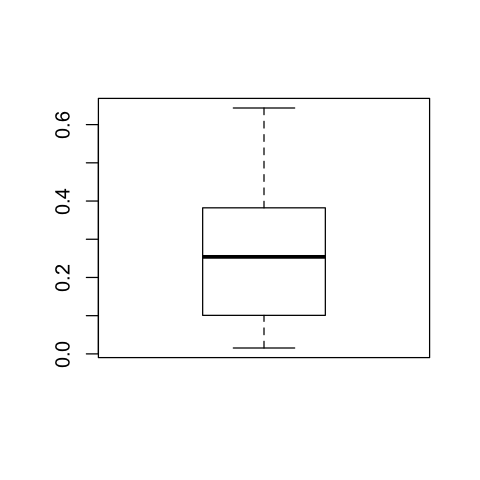

In [86]:
summary(dfCrime$pctmin80)
boxplot(dfCrime$pctmin80)

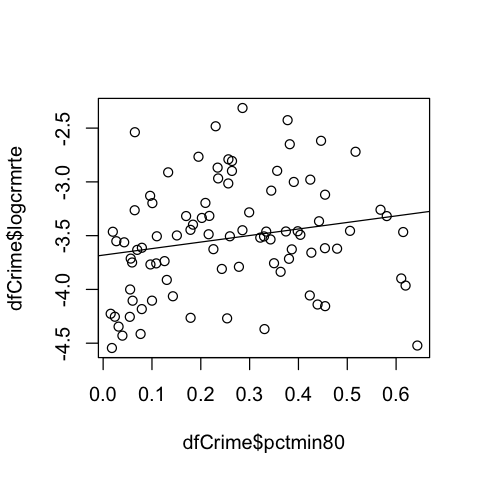

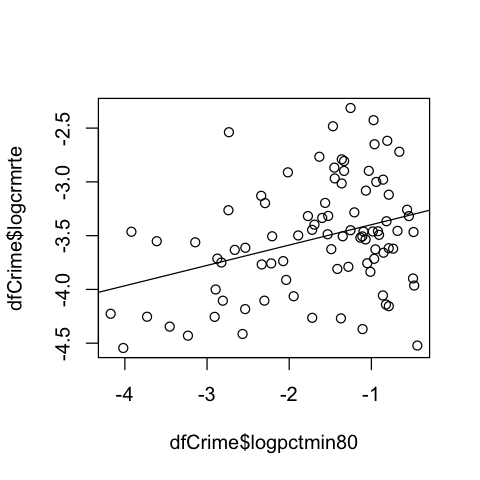

In [87]:
plot(dfCrime$pctmin80, dfCrime$logcrmrte)
abline(lm(dfCrime$logcrmrte~dfCrime$pctmin80))
plot(dfCrime$logpctmin80, dfCrime$logcrmrte)
abline(lm(dfCrime$logcrmrte~dfCrime$logpctmin80))

### Model 3 Linear Model

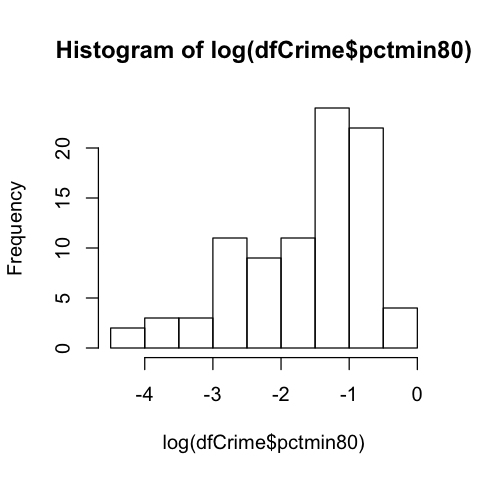

In [160]:
hist(log(dfCrime$pctmin80))

In [179]:
model3<-lm(logcrmrte ~ logcrimJustEff + logpolpc + log(allWages) + logtaxpc + density +
             logpctmin80, data = dfCrime)
summary(model3)


Call:
lm(formula = logcrmrte ~ logcrimJustEff + logpolpc + log(allWages) + 
    logtaxpc + density + logpctmin80, data = dfCrime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67932 -0.13417  0.01256  0.14698  0.68797 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -8.17317    3.17228  -2.576 0.011775 *  
logcrimJustEff -0.87223    0.14430  -6.044 4.24e-08 ***
logpolpc        0.42262    0.11051   3.824 0.000255 ***
log(allWages)   1.01663    0.36266   2.803 0.006312 ** 
logtaxpc       -0.34395    0.14706  -2.339 0.021778 *  
density         0.08781    0.02853   3.077 0.002839 ** 
logpctmin80     0.24308    0.03324   7.313 1.58e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2741 on 82 degrees of freedom
Multiple R-squared:  0.7436,	Adjusted R-squared:  0.7248 
F-statistic: 39.63 on 6 and 82 DF,  p-value: < 2.2e-16


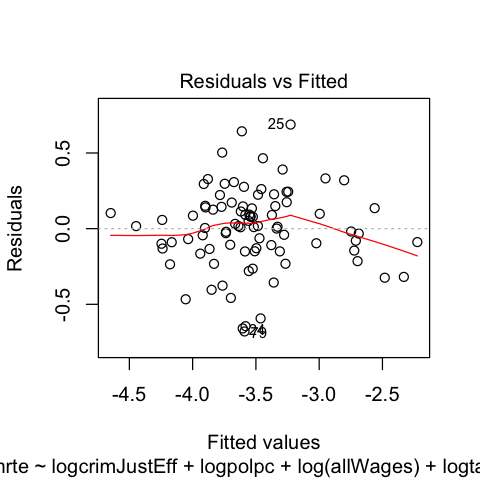

In [167]:
plot(model3, which = 1)

Evidence of Zero Conditional Mean but not homoskedacity

In [180]:
coeftest(model3, vcov=vcovHC)
vcovHC(model3)


t test of coefficients:

                Estimate Std. Error t value  Pr(>|t|)    
(Intercept)    -8.173171   5.900333 -1.3852   0.16975    
logcrimJustEff -0.872231   0.202707 -4.3029 4.628e-05 ***
logpolpc        0.422616   0.207327  2.0384   0.04473 *  
log(allWages)   1.016635   0.622074  1.6343   0.10604    
logtaxpc       -0.343954   0.198685 -1.7311   0.08719 .  
density         0.087808   0.034590  2.5385   0.01302 *  
logpctmin80     0.243085   0.038221  6.3601 1.082e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [169]:
vif(model3)

logcrimJustEff       logpolpc  log(allWages)       logtaxpc        density 
      1.439428       1.520483       1.802978       1.394609       2.206358 
   logpctmin80 
      1.098696

In [178]:
model4<-lm(logcrmrte ~ logcrimJustEff + logpolpc + log(allWages) + logtaxpc + density +
             logpctmin80 + logpctmin80*log(allWages) + logpctmin80*logcrimJustEff, data = dfCrime)
summary(model4)


Call:
lm(formula = logcrmrte ~ logcrimJustEff + logpolpc + log(allWages) + 
    logtaxpc + density + logpctmin80 + logpctmin80 * log(allWages) + 
    logpctmin80 * logcrimJustEff, data = dfCrime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76629 -0.13686  0.01446  0.12369  0.63900 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.72707    5.19577   0.910  0.36567    
logcrimJustEff             -1.28063    0.23719  -5.399 6.68e-07 ***
logpolpc                    0.50233    0.10845   4.632 1.38e-05 ***
log(allWages)              -0.61462    0.63261  -0.972  0.33420    
logtaxpc                   -0.28065    0.14115  -1.988  0.05020 .  
density                     0.07028    0.02777   2.531  0.01335 *  
logpctmin80                 8.57331    2.95863   2.898  0.00485 ** 
log(allWages):logpctmin80  -1.07152    0.37163  -2.883  0.00505 ** 
logcrimJustEff:logpctmin80 -0.19763    0.10887  -1.815  0.07322 .  
---


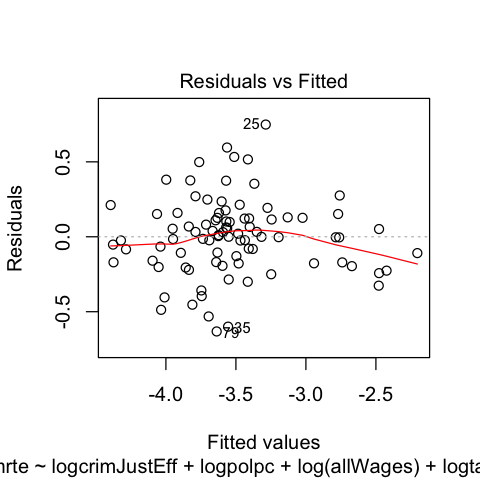

In [163]:
plot(model4,which=1)

In [175]:
vif(model4)

logcrimJustEff                   logpolpc 
                  4.364018                   1.643110 
             log(allWages)                   logtaxpc 
                  6.156229                   1.441753 
                   density                logpctmin80 
                  2.345475                9767.190917 
 log(allWages):logpctmin80 logcrimJustEff:logpctmin80 
               9733.540324                  17.577234

The model shows a good fit, with an adjusted R-squared of 0.7322, meaning that the model explains 73% of the variation in crime. 

For all of our 6 different independent variables, we note each of them have statistical significance at the 95% level or better. Of these 6,  criminal justice efficiency, minority percentages and density are the most significant.

**Interpretation of coefficients (Assuming ceterus paribus):**

Positive coefficients:
* Police presence: If we increase police per capita by 1 unit, we expect the crime rate to increase by 33%.
* AllWages: If we increase wages by 1 dollar, we expect the crime rate to increase by 0.01%
* Density: If we increase density by 1 unit, we expect the crime rate to increase by 5%
* Percentage of minorities: If the percentage of minorities increase by 1%, we expect the crime rate to increase by 0.24%

Negative coefficients:
* Criminal justice efficiency: If we increase the criminal justice efficiency by 1%, we expect the crime rate to decrease by 0.34%.
* Tax per capita: If we increase tax per capita by 1 unit, we expect the crime rate to decrease by 0.35%

In addition, the F-statistic is 40.04 with a statistically significant p-value of < 2.2e-11. As a result, we reject the null hypothesis that none of the independent variables help to describe log(crmrate). 


**[Comment on standard error]**

In the Residuals vs Leverage plot below, all the points have a cook's distance of less than 0.5. While there is a point with 0.6 leverage, there are no points that have residual that greatly alter the model coefficients.

The root of standardized residuals all fall within about 1.6. This is very good, as we can expect 95% of the points to fall within 3 standardized residuals of each other. ( (⎯⎯√3)≈1.73 )

Finally, the residuals vs fitted plot shows a well centered and mostly normal distribution about 0. There are no major trends or variation changes across the fitted values. This suggests that major uncorrelated variables have not been left out of the model.

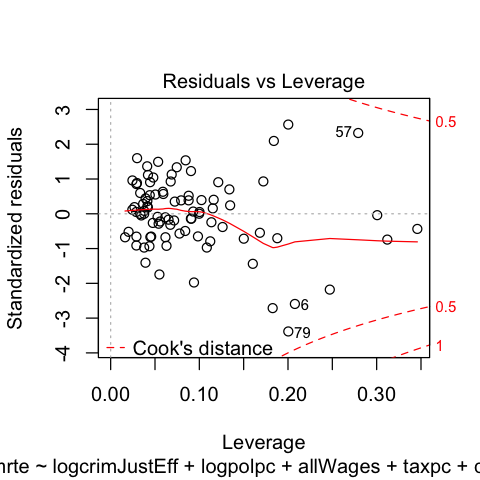

In [90]:
plot(model3, which = 5)

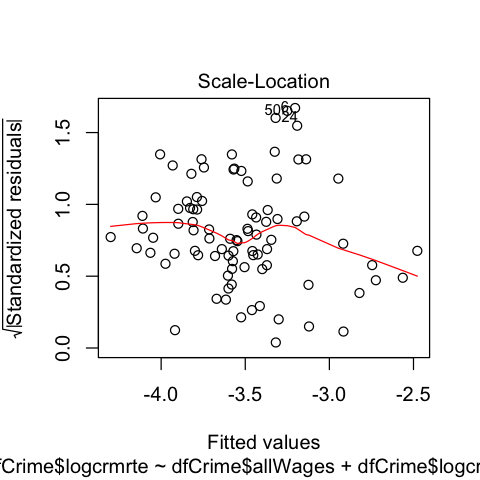

In [91]:
plot(mod1, which=3)

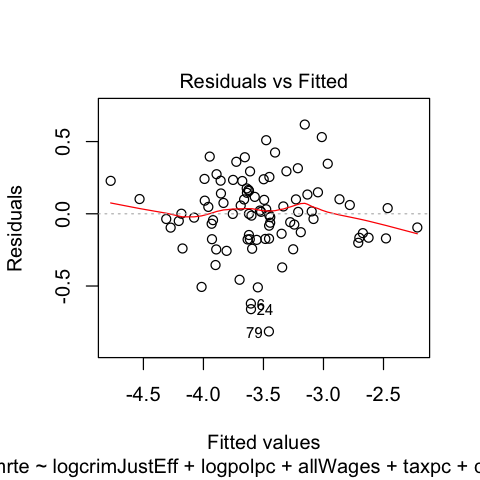

In [92]:
plot(model3, which=1)

**Model 3 CLM Assumptions: [To be finalized]**

* **MLR1** Linear in paramters: The model has had its data transformed as described above to allow a linear fit of the model.
* **MLR2** Random Sampling: The data is collected from a data set with rolled up data for each county.  It is not randomly sampled by area or population. 
* **MLR3** No perfect multicollinearity: None of the variables chosen for the model are constant or perfectly collinear with each other. Our new variables for percentage minority and percentage young males may have some relationships with the other variables but they are not perfectly colinear as noted from the scatterplot matrix in our EDA.
* **MLR4'** The expectation of u and and covariance of each regressor with u are ~0.  This shows that our model's regressors are exogenous with the error.

By satisfying these assumptions, we can expect that our coefficients are approaching the true parameter values in probability. 

##MLR 5,6 to be discussed in week 13...?

### Results:

## Comparison of Regression Models

***Can anyone figure out why logcrimJustEff is on 2 lines?**

In [93]:
stargazer(mod1,model2,model3,type="text")


                                            Dependent variable:                         
                    --------------------------------------------------------------------
                          logcrmrte                          logcrmrte                  
                             (1)                    (2)                    (3)          
----------------------------------------------------------------------------------------
allWages                   0.001***                                                     
                           (0.0001)                                                     
                                                                                        
logcrimJustEff            -1.000***                                                     
                           (0.174)                                                      
                                                                                        
logcrimJustEff      

Comparing the 3 models, we see that our adjusted R2 value has steadily increased from 0.456-0.732 as we introduce more covariates which indicates that we were able to explain more variation in our model not purely by increasing the number of indepedent variables. 

At the same time, our standard errors have decreased **insert more commentary on standard errors**.

We see that by expanding our definitions of criminal justice efficiency  and economic opportunity between model 1 and model 3 lowered the coefficients for logcrimJustEff and allWages. This is most likely because that we were able to better explain the effects with our newer variables.

Comment on practical significance after week 12

# Conclusion

## Policy Recommendations

Given that across all 3 models, we show that both criminal justice efficiency and tax revenues per capita have negative correlations to crime rate, we propose the policy recommendations below to address these issues. In addition, since minority percentages and density were found to be highly significant in the model 3, we believe our recommendations will be of particularly help to those  running for political office in counties with a high percentage of minorities or dense urban populations.

1. Since increasing both criminal justice and tax revenues are negatively correlated, we propose providing more funding for the local justice system. 

2. While increasing taxes on constituents may be difficult politically and may cost candidates the ballot, candidates can instead try to attract investment to bring more jobs with higher wages so you can increase revenues.

3.  Candidates can also propose to levy taxes on things that could lead to crimes or violence such as alcohol and weapons.

4. Given the significance and relatively large coefficient size of percentage minority, candidates should enroll local law enforcement into bias training.

## Ommitted Variables

| Expected correlation between omitted and included variables |
| ---- |

| Omitted Variable | Crime Rate ($B_k$) | Criminal Justice Effectiveness | Economic Conditions |
|------------------|--------------------|--------------------------------|---------------------|
| Education        | -                  |              unknown           | +                   |
| Social Services  | -                  |              unknown           | unknown             |
| Unemployment     | +                  |              unknown           | -                   |
| Gang Activity    | +                  | -                              | -                   |

The 4 major identified ommited variables are shown above. 

* Education is an important variable because of demographic insights it provides.  First, adults with higher education are less likely to participate in Crime and are more likely to have better economic opportunity. Second, a strong school system is also likely correlated with less youth crime.  Because of these expected correlations we are likely overestimating the economic conditions coefficient estimate. 
* Available Social Services could also lower crime.  Citizens with strong social services support have more options to get help when they lack means for purchasing basic life needs.  However this is more difficult to predict, as some social service projects, like homeless shelters, could lead to more criminal activity.
* Unemployment is used as an important indicator of economic health and opportunity.  This is would be highly correlated to economic conditions variables like sum of wages.  This indicator variable if added to the model would decrease the magnitude of the sum of wage means coefficient estimate.  
* Gang or Organized Crime is special case of crime that contains unique causes.  It is expected that it would be negatively correlated with criminal justice effectiveness as large social pressures prevent witnesses from supporting prosecution.  Gang crime is also negatively correlated with economic conditions.  From these assumed correlations, we can say that criminal justice effectiveness and economic conditions are both underestimated compared to including gang activity operationalized variable in the model.

## Research Recommendations

We have shown in this report 3 different models that seek to explain and model changes in the crime rate in North Carolina in 1980. We start with the fundamental premise that crime is caused by both criminal justice efficiency and economic conditions, and further develop our definition of these two key explanatory variables which each new model. 

In Model 3, we were able to explain up to 73% of the variation in our data, and found statistical significance at the 95% level or better for each of our covariates. Of these, we believe that increasing the efficiency of the criminal justice system and tax revenues were the most important, particularly for counties with high density and minority populations. However, our findings should be noted with caution as we were unable to study the effect of several ommitted variables including education, availability of social services, unemployment rates and the presence of organized crime. Had we been able to collect data on these variables and apply them in our model, we believe we could increase accuracy without bias.

In [170]:
modelwage<-lm(logcrmrte~dfCrime$wcon + dfCrime$wtuc + dfCrime$wtrd + dfCrime$wfir +
    dfCrime$wser + dfCrime$wmfg + dfCrime$wfed + dfCrime$wsta + dfCrime$wloc, data=dfCrime)

In [171]:
vif(modelwage)

dfCrime$wcon dfCrime$wtuc dfCrime$wtrd dfCrime$wfir dfCrime$wser dfCrime$wmfg 
    2.014954     1.517659     2.611913     2.508263     2.249289     1.754677 
dfCrime$wfed dfCrime$wsta dfCrime$wloc 
    2.380644     1.279927     2.229800

In [184]:
dfCrime

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,logpolpc,logmix,logdensity,logtaxpc,logpctmin80,logpctymle,logcrmrte,allWages,crimJustEff,logcrimJustEff
1,1,87,0.0356036,0.298270,0.5275960,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,-6.304609,-2.5236211,0.88485484,3.433783,-1.5985622,-2.552702,-3.335308,3054.890,0.15736605,-0.8030890
2,3,87,0.0152532,0.132029,1.4814800,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,-7.200946,-3.4990296,0.04529072,3.291832,-2.5362438,-2.493662,-4.182966,2652.879,0.19559832,-0.7086349
3,5,87,0.0129603,0.444444,0.2678570,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,-6.697243,-0.7654678,-0.88487455,3.550079,-3.4544304,-2.629488,-4.345864,2553.648,0.11904743,-0.9242800
4,7,87,0.0267532,0.364760,0.5254240,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,-6.482527,-1.2960076,-0.71017695,3.759980,-0.7357186,-2.609963,-3.621101,2823.133,0.19165367,-0.7174829
5,9,87,0.0106232,0.518219,0.4765630,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,-7.058369,-2.8119811,-0.60340086,3.334158,-4.0195024,-2.649344,-4.544715,2759.238,0.24696400,-0.6073663
6,11,87,0.0146067,0.524664,0.0683761,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,-5.849260,-1.1409146,-0.49210847,3.561891,-4.1729334,-2.313452,-4.226275,2586.290,0.03587448,-1.4452144
7,13,87,0.0296409,0.365004,0.5206070,0.420833,10.55,0.00133771,0.5169492,30.69649,⋯,-6.616796,-1.8814287,-0.65981071,3.424148,-1.1338436,-2.648837,-3.518600,2767.395,0.19002364,-0.7211924
8,15,87,0.0202814,0.392111,0.7692310,0.507692,10.64,0.00103525,0.3009986,34.00304,⋯,-6.873112,-1.4483527,-1.20064977,3.526450,-0.4934115,-2.599571,-3.898051,2687.745,0.30162395,-0.5205342
9,17,87,0.0304289,0.251599,0.4364410,0.436893,7.32,0.00129761,0.3503982,34.96204,⋯,-6.647231,-1.5224265,-1.04868511,3.554263,-0.9066127,-2.555008,-3.492362,2549.512,0.10980813,-0.9593655
10,19,87,0.0221567,0.162860,1.2256100,0.333333,10.34,0.00202425,0.5767442,61.15251,⋯,-6.202556,-2.9309323,-0.55035644,4.113371,-1.4142124,-2.562233,-3.809615,3149.197,0.19960285,-0.6998333
